In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
from sklearn.impute import KNNImputer
import joblib
from sklearn.impute import KNNImputer
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [129]:
def read_data_from_file(path, delimiter):
    """
    Read data from a file using pandas.

    Args:
        path (str): The file path.
        delimiter (str): The delimiter used in the file.

    Returns:
        pandas.DataFrame or None: The loaded data as a DataFrame if successful, or None if an error occurs.

    Raises:
        FileNotFoundError: If the file is not found.
        pd.errors.ParserError: If there is an error parsing the file.

    """
    try:
        df = pd.read_csv(path, delimiter=delimiter)
        return df
    except FileNotFoundError:
        print("File not found!")
    except pd.errors.ParserError:
        print("Error parsing the file. Please check the delimiter.")


In [130]:
def select_categorical_columns(data):
    """
    Select categorical columns from a DataFrame.

    Args:
        data (pandas.DataFrame): The input DataFrame.

    Returns:
        list: A list of column names containing categorical variables.

    """
    categorical_columns = data.select_dtypes(include='object').columns.tolist()
    return categorical_columns

In [131]:
def select_numerical_columns(data):
    """
    Select numerical columns from a DataFrame.

    Args:
        data (pandas.DataFrame): The input DataFrame.

    Returns:
        list: A list of column names containing numerical variables.

    """
    numerical_columns = data.select_dtypes(include='number').columns.tolist()
    return numerical_columns

In [225]:
def encode_data(data, columns, encoding_type):
    """
    Encodes the specified columns in the data using either one-hot encoding or label encoding.
    
    Args:
        data (pandas.DataFrame): The input data.
        columns (list): The columns to be encoded.
        encoding_type (str): The type of encoding to be performed. Can be either 'one-hot' or 'label'.
    
    Returns:
        encoded_data (pandas.DataFrame): The encoded data.
    """
    encoded_data = data.copy()
    
    for column in columns:
        if encoding_type == 'one-hot':
            encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
            encoded_column = encoder.fit_transform(encoded_data[[column]])
            encoded_column = pd.DataFrame(encoded_column, columns=encoder.get_feature_names_out([column]))
            encoded_data = pd.concat([encoded_data, encoded_column], axis=1)
            encoded_data.drop(column, axis=1, inplace=True)
        elif encoding_type == 'label':
            encoder = LabelEncoder()
            encoded_data[column] = encoder.fit_transform(encoded_data[column])
        else:
            raise ValueError("Invalid encoding_type. Supported values are 'one-hot' and 'label'.")
    
    return encoded_data

In [133]:
def delete_columns(data, columns):
    """
    Deletes the specified columns from the data.
    
    Args:
        data (pandas.DataFrame): The input data.
        columns (list): The columns to be deleted.
    
    Returns:
        modified_data (pandas.DataFrame): The data with specified columns deleted.
    """
    modified_data = data.drop(columns, axis=1)
    return modified_data


In [134]:
df = read_data_from_file(path = 'Binary_Classification_Medical.txt', delimiter = '\t')

## EDA

In [135]:
def visulization_with_target(df, column, target):
    """
    Perform visualization of a categorical column with respect to a target variable.

    Args:
        df (pandas.DataFrame): The input DataFrame.
        column (str): The name of the categorical column to visualize.
        target (str): The name of the target variable.

    Returns:
        None

    """
    print(column)
    print(df[column].value_counts(normalize=True))
    sns.countplot(data=df, x=column, hue=target)
    plt.xticks(rotation=45)
    plt.show()

In [136]:
def visulization_num_with_target(df, column):
    print(column)
    print('skwed',df[column].skew())
    sns.boxplot(df[column])
    plt.show()

In [137]:
def Rel_chi_square(df, column, target):
    """
    Perform the chi-square test of independence between a categorical column and a target variable.

    Args:
        df (pandas.DataFrame): The input DataFrame.
        column (str): The name of the categorical column.
        target (str): The name of the target variable.

    Returns:
        None

    """
    # create a contingency table
    print(column)
    contingency_table = pd.crosstab(df[column], df[target])

    # perform chi-square test
    stat, p, dof, expected = chi2_contingency(contingency_table)

    # print the results
    print('Chi-square statistic:', stat)
    print('p-value:', p)

In [138]:
df.shape

(264, 101)

In [139]:
df.isna().sum()[df.isna().sum() > 0]

gender_m1                            6
KHK_1_2_3                            6
height_cm                            6
gewicht_kg                           6
bmi_kgperm2                          6
                                    ..
apoplex_in_der_vorgeschichte         6
alzheimer_demenz_in_der_vorgesch     6
carotisstenose                       6
cortison_oder_mtx                    6
beatmungsdauer_icu_stunden          18
Length: 79, dtype: int64

instable_angina
n    0.867424
y    0.132576
Name: instable_angina, dtype: float64


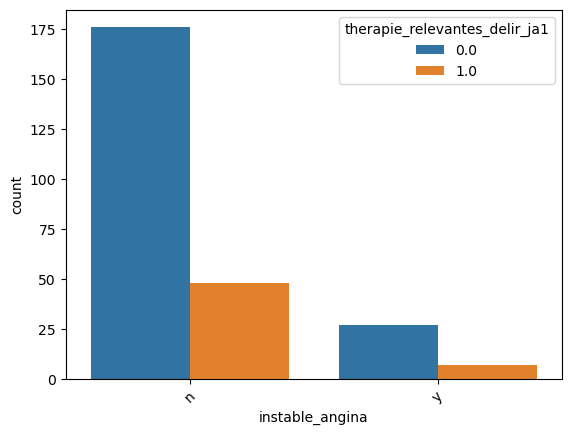

dialysis
n    0.984848
y    0.015152
Name: dialysis, dtype: float64


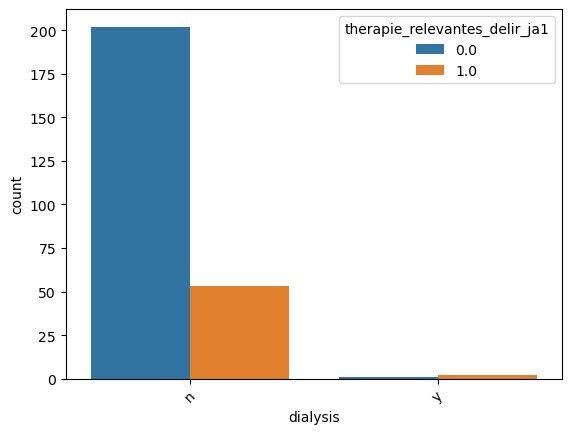

copd
n    0.863636
y    0.136364
Name: copd, dtype: float64


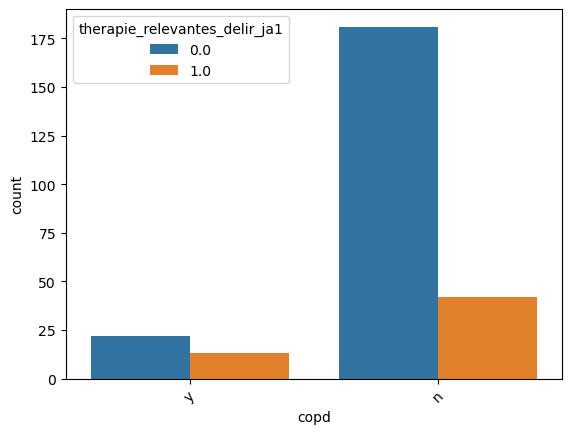

copd_dauermedikation
n    0.939394
y    0.060606
Name: copd_dauermedikation, dtype: float64


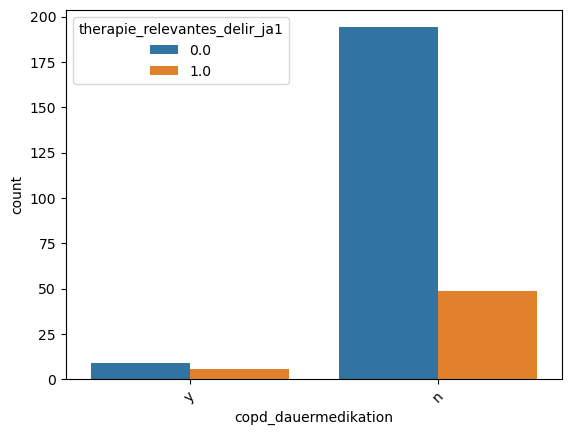

extrakard_arterienerkrankung
n    0.579545
y    0.420455
Name: extrakard_arterienerkrankung, dtype: float64


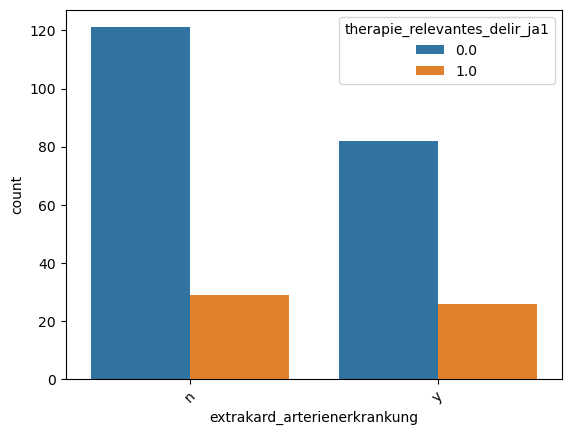

impairment_mobility
n    0.977273
y    0.022727
Name: impairment_mobility, dtype: float64


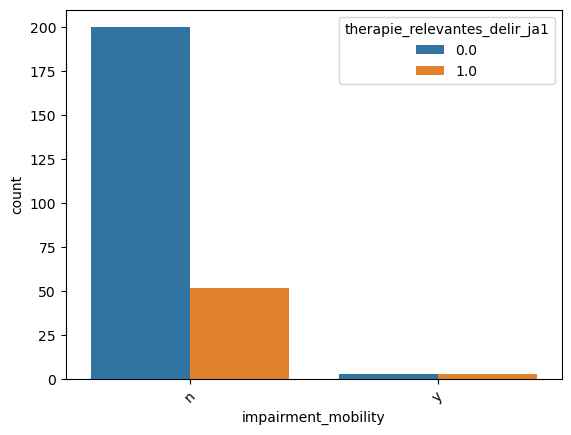

acute_endocarditis
n    1.0
Name: acute_endocarditis, dtype: float64


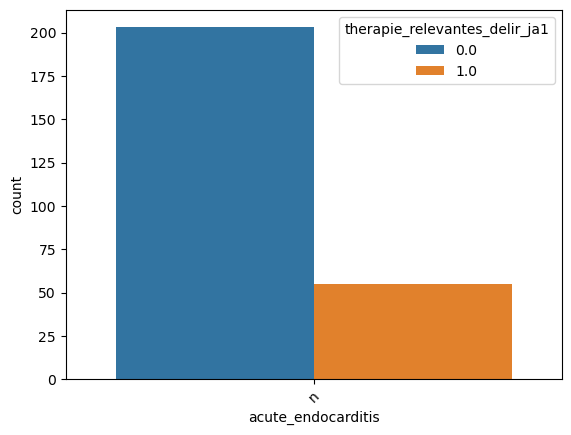

iddm
n    0.871212
y    0.128788
Name: iddm, dtype: float64


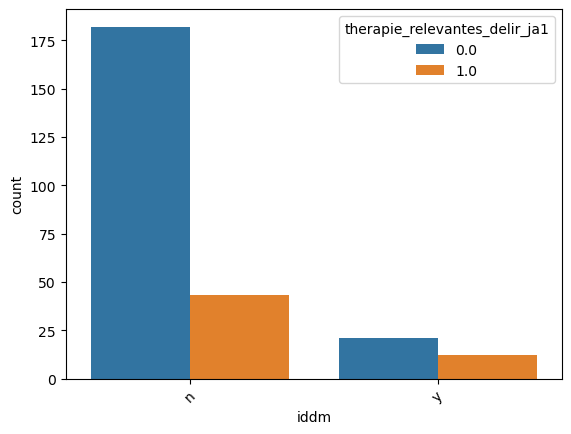

pah
n      0.973485
mod    0.022727
y      0.003788
Name: pah, dtype: float64


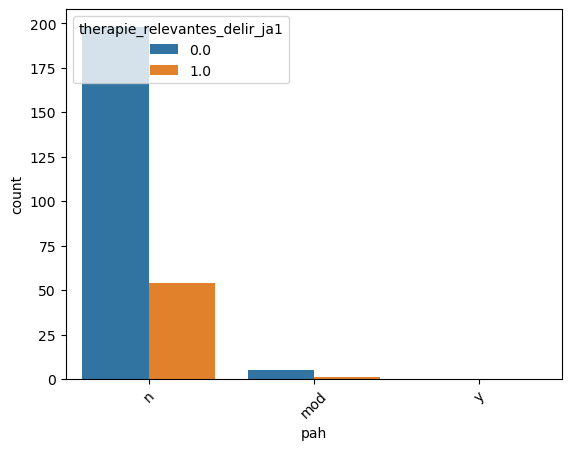

re_op
n    0.977273
y    0.022727
Name: re_op, dtype: float64


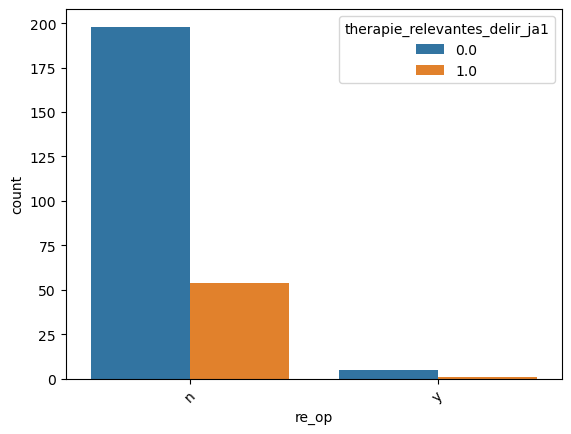

mi_in_last90_days
n    0.704545
y    0.295455
Name: mi_in_last90_days, dtype: float64


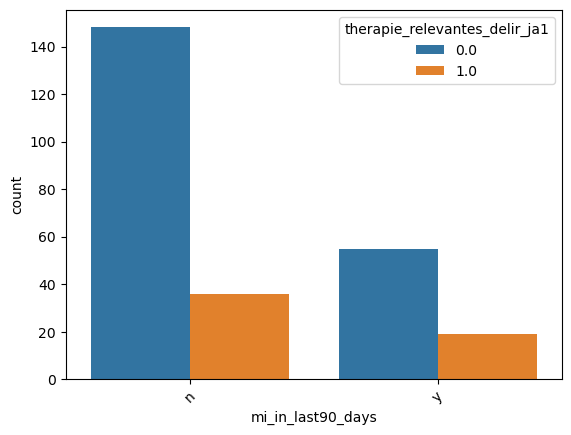

preop_critical
n    0.977273
y    0.022727
Name: preop_critical, dtype: float64


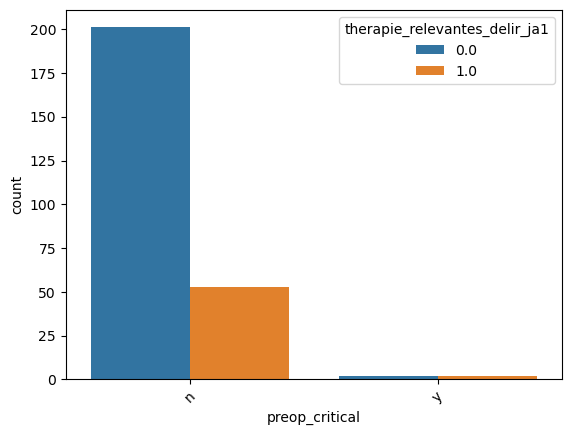

surgery_urgency
n    0.594697
u    0.276515
e    0.121212
s    0.007576
Name: surgery_urgency, dtype: float64


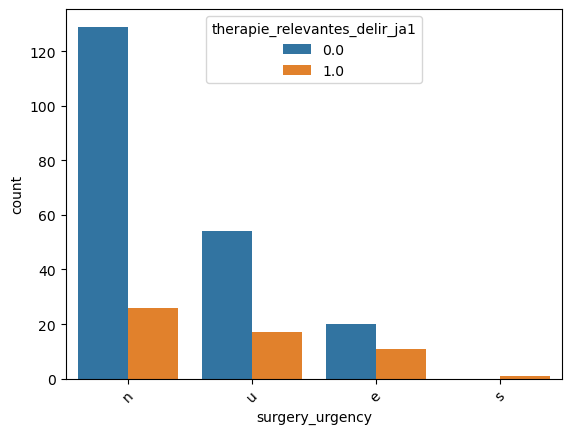

comb_surgery
n    1.0
Name: comb_surgery, dtype: float64


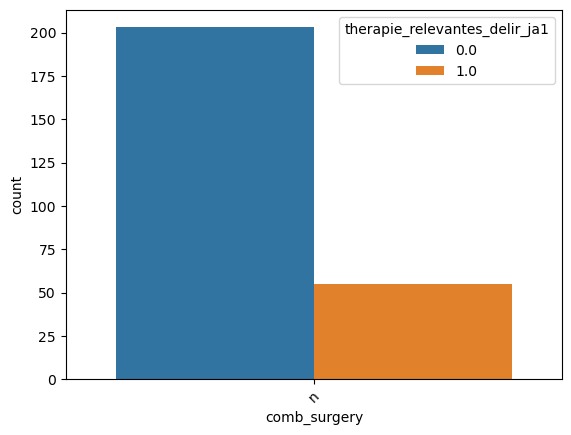

thoracal_aortic_surgery
n    1.0
Name: thoracal_aortic_surgery, dtype: float64


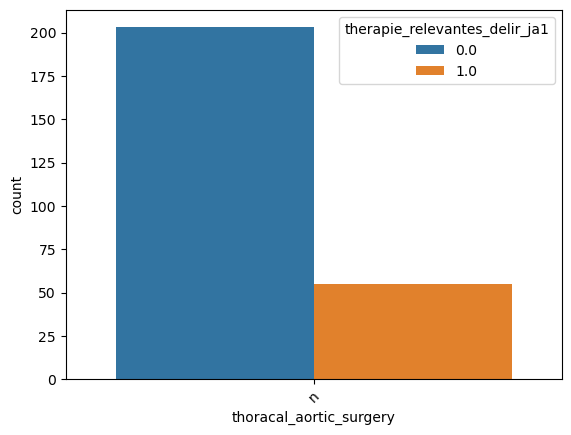

group_gesamtbilanz
5-10L    0.465116
3-5L     0.302326
0-3L     0.143411
>10L     0.089147
Name: group_gesamtbilanz, dtype: float64


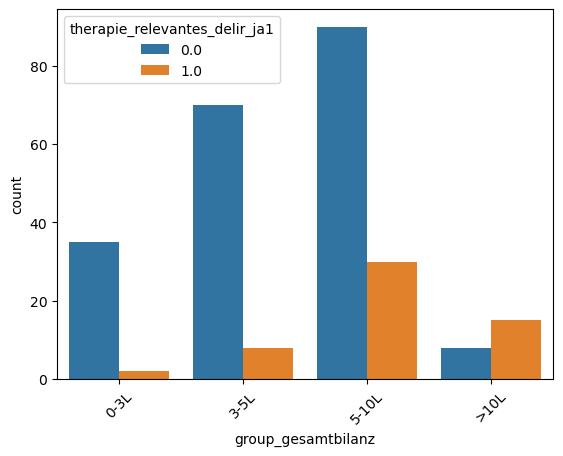

In [11]:
categorical_features = select_categorical_columns(df)
for col in categorical_features:
    visulization_with_target(df, col, 'therapie_relevantes_delir_ja1')

In [12]:
#surgery_urgency one hot
#group_gesamtbilanz one hot

In [13]:
categorical_features = select_categorical_columns(df)
for col in categorical_features:
    Rel_chi_square(df, col, 'therapie_relevantes_delir_ja1')

instable_angina
Chi-square statistic: 0.0
p-value: 1.0
dialysis
Chi-square statistic: 1.4886941861384053
p-value: 0.22241917480211468
copd
Chi-square statistic: 5.003510042278293
p-value: 0.02529596825902339
copd_dauermedikation
Chi-square statistic: 2.2368472906403944
p-value: 0.13475548842652016
extrakard_arterienerkrankung
Chi-square statistic: 0.5824352888490831
p-value: 0.44535934550872214
impairment_mobility
Chi-square statistic: 1.5164576802507839
p-value: 0.21815633984976487
acute_endocarditis
Chi-square statistic: 0.0
p-value: 1.0
iddm
Chi-square statistic: 4.130184749419859
p-value: 0.04212475166824216
pah
Chi-square statistic: 0.0
p-value: 1.0
re_op
Chi-square statistic: 0.0
p-value: 1.0
mi_in_last90_days
Chi-square statistic: 0.8387298233999884
p-value: 0.3597602947878079
preop_critical
Chi-square statistic: 0.6343080351633161
p-value: 0.4257794876385139
surgery_urgency
Chi-square statistic: 9.599360254966953
p-value: 0.0222974919345532
comb_surgery
Chi-square statistic: 0.

If the p-value is below a certain significance level (e.g., 0.05), it suggests a statistically significant relationship between the variables.

* instable_angina
* dialysis
* copd_dauermedikation
* extrakard_arterienerkrankung
* impairment_mobility
* acute_endocarditis
* pah
* re_op
* mi_in_last90_days
* preop_critical
* comb_surgery
* thoracal_aortic_surgery


In [140]:
numerical_features = select_numerical_columns(df)

fallnr
skwed 0.1741211043764962


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


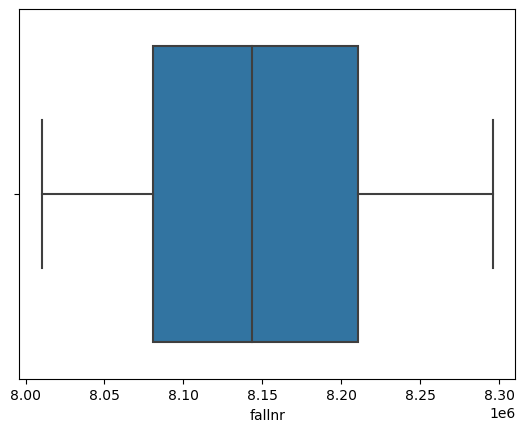

verstorben_1
skwed 4.190317845936776


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


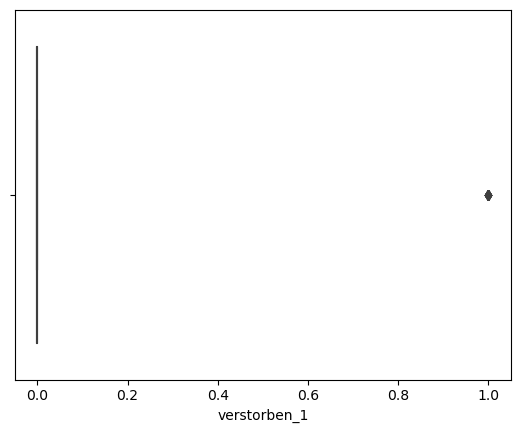

creatinine_clearance
skwed 1.1139242970841112


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


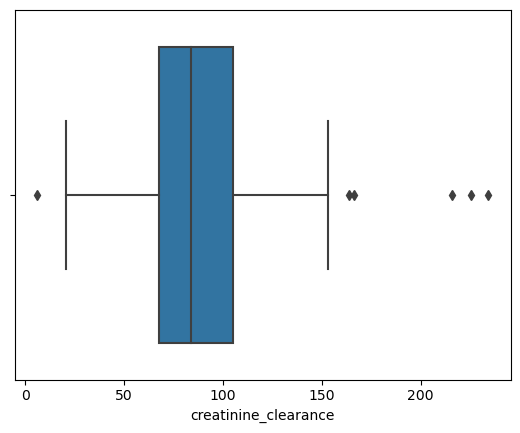

ef_percent
skwed -1.426642096823296


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


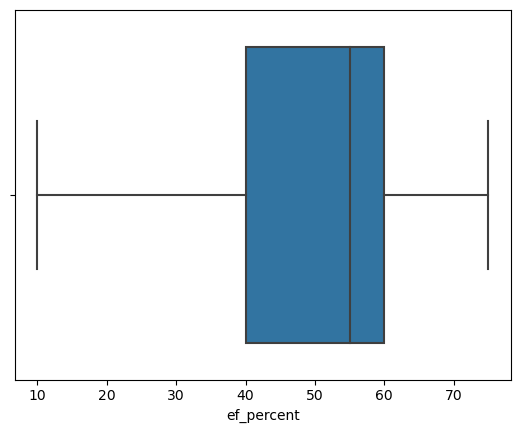

nyha
skwed -0.534932448028591


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


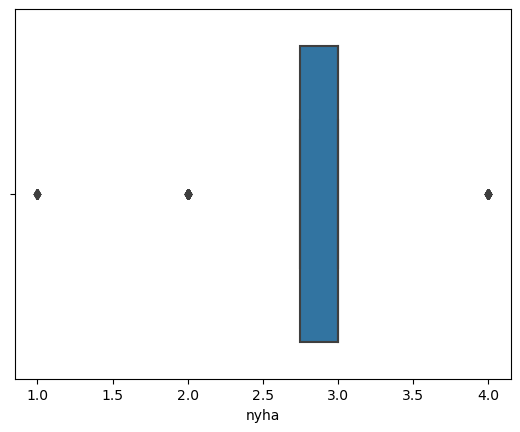

log_euroscore_perc
skwed 6.860657357530644


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


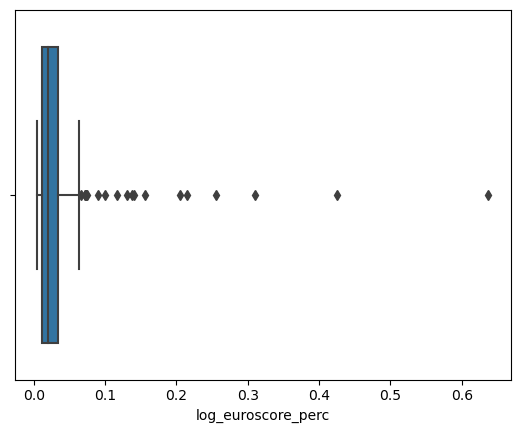

gender_m1
skwed -1.7993325585477535


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


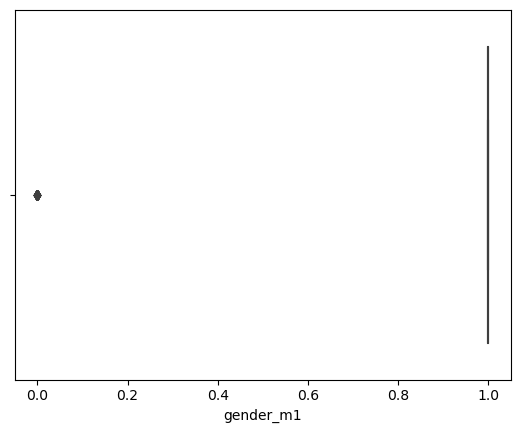

KHK_1_2_3
skwed -2.2046889865628483


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


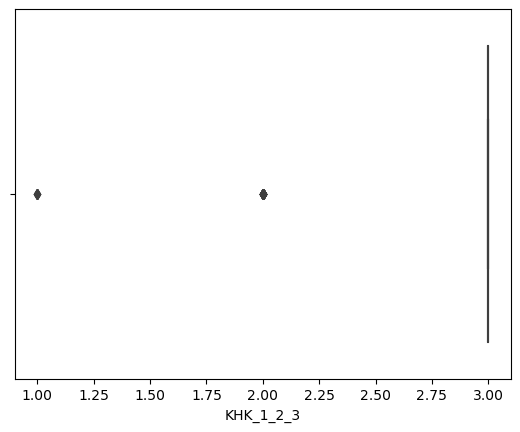

height_cm
skwed -0.3668470505435309


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


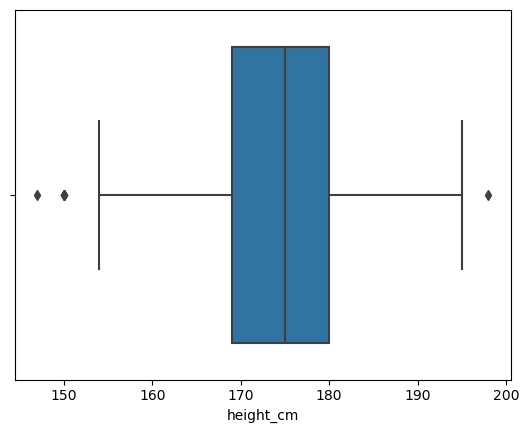

gewicht_kg
skwed 1.0348828475672367


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


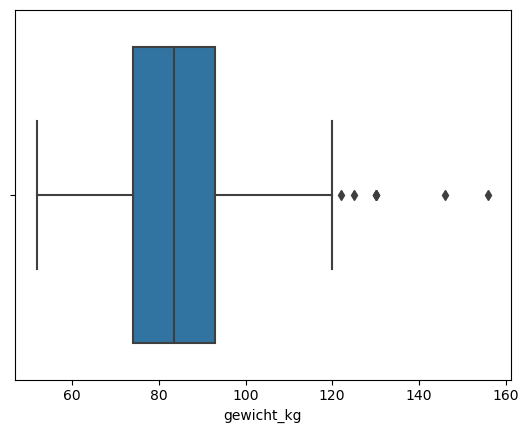

bmi_kgperm2
skwed 0.7211837074330715


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


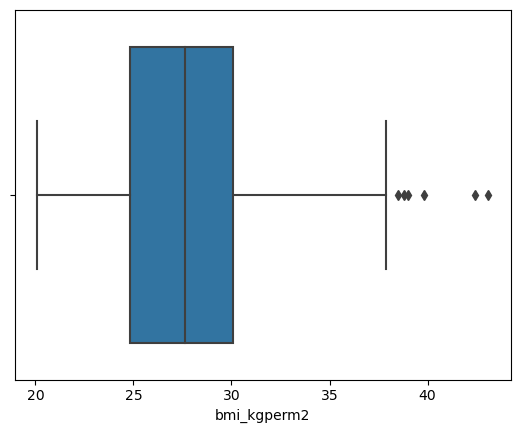

a_ht
skwed -3.9582694489028842


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


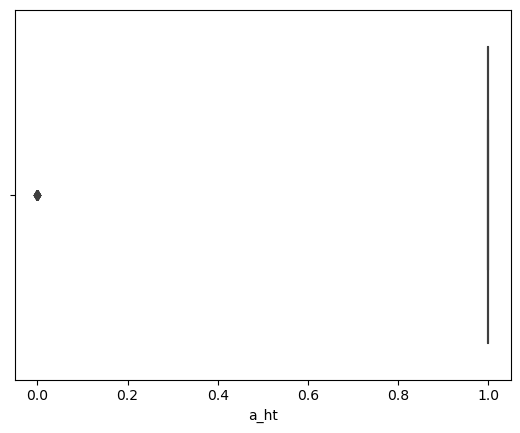

dm
skwed 0.7870476795667022


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


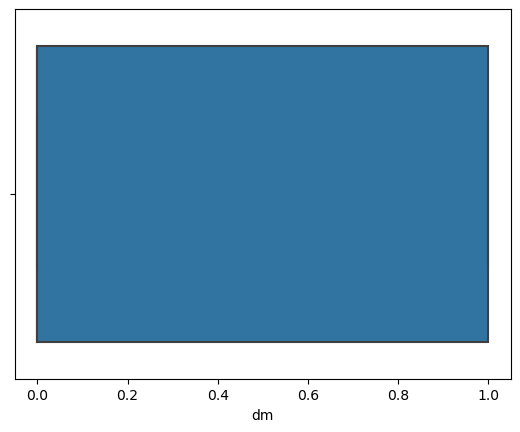

nikotibusus
skwed -0.06240876800024408


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


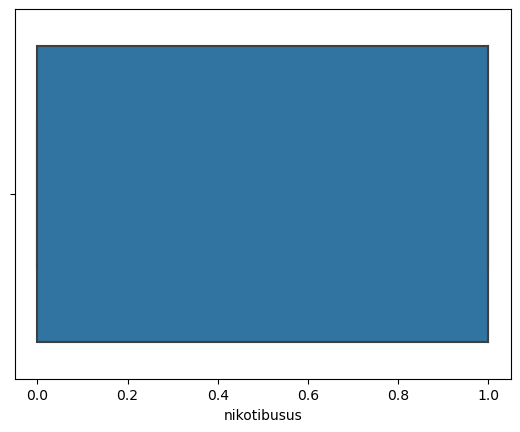

adipositas
skwed 0.8861049009789155


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


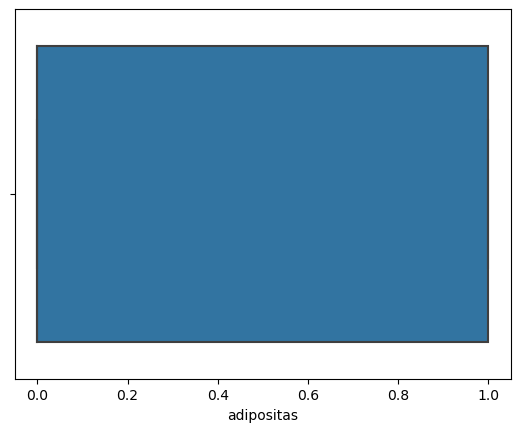

hyperlipidemie
skwed -1.2226928350894193


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


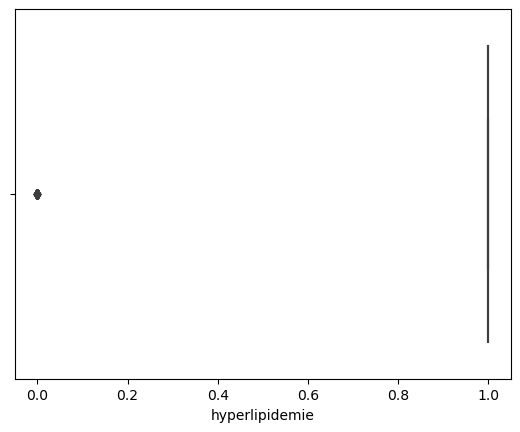

familiaere_disposition
skwed 1.8375288940965515


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


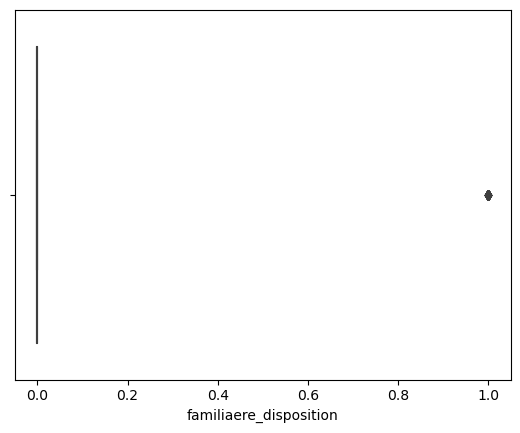

male_1
skwed -1.7993325585477535


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


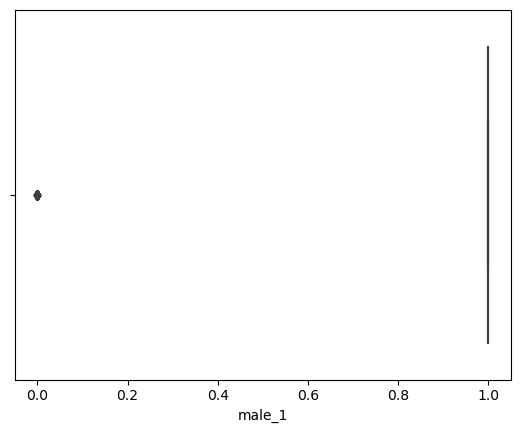

gesamt_cvrf
skwed 0.10854868521666175


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


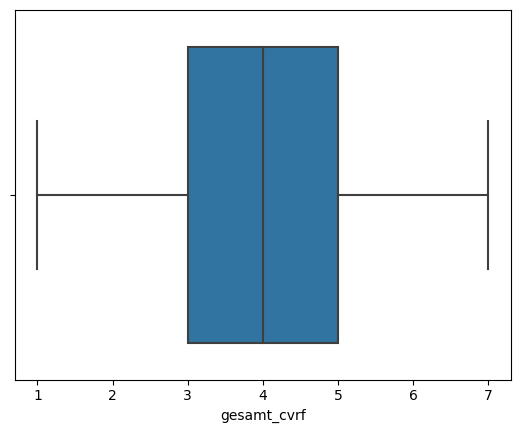

anzahl_der_bypaesse
skwed -0.40728697126281294


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


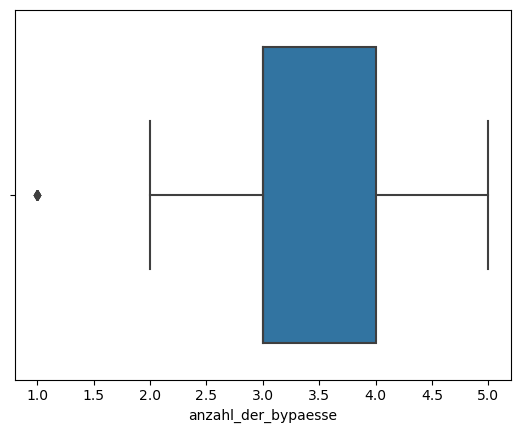

mamaria_ja1
skwed -4.3320566793388116


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


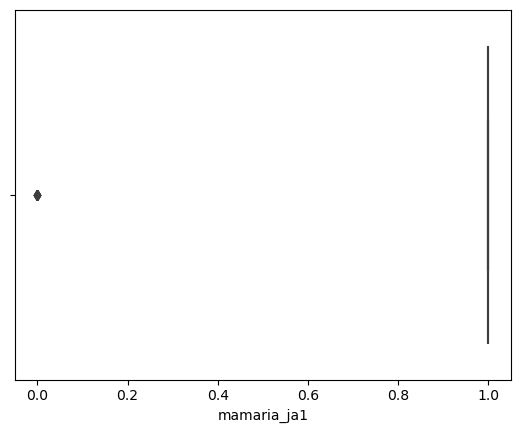

doppelmamaria_ja1
skwed 2.9005106278582145


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


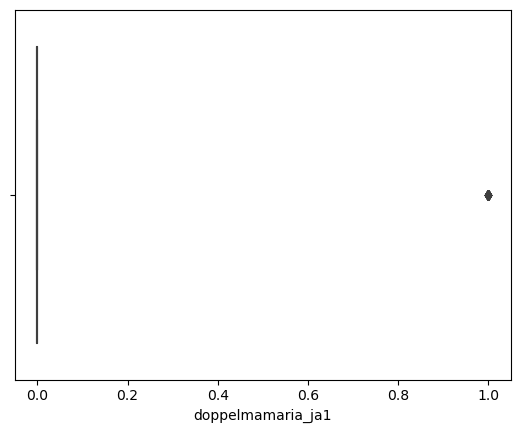

opcab_ja1
skwed 4.807148805915607


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


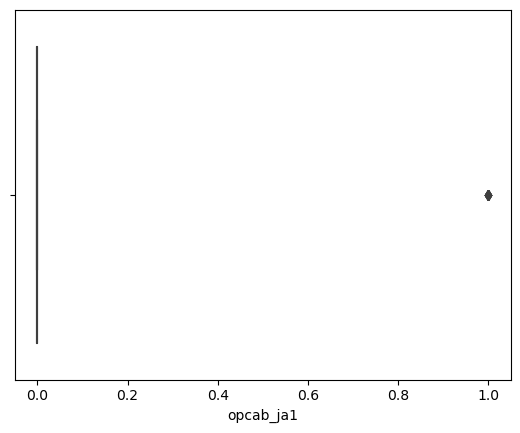

komplikationen_ja1
skwed 2.046714533573307


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


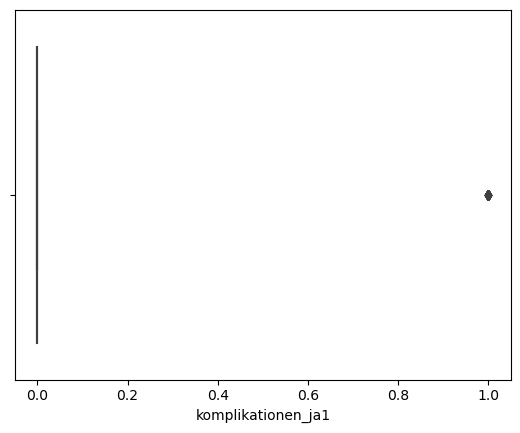

eks
skwed 4.46708257874355


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


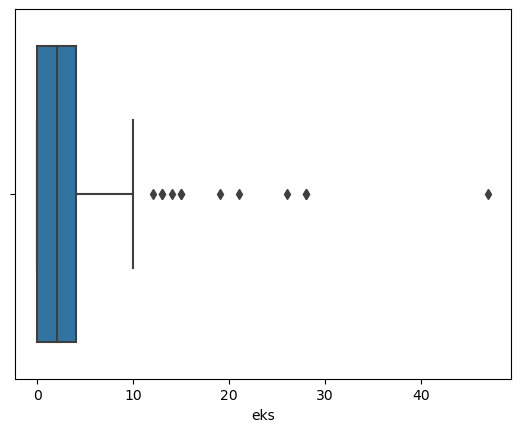

ffps
skwed 3.3955018338389023


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


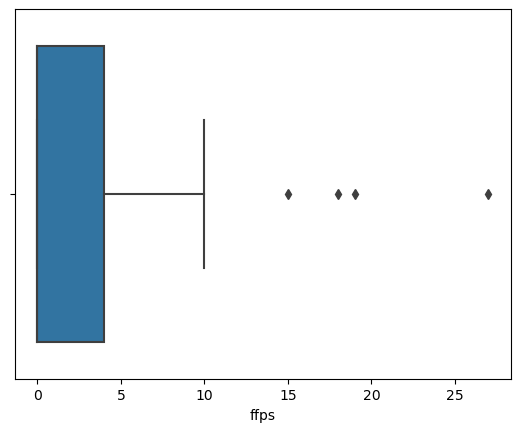

tks
skwed 4.919379509846244


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


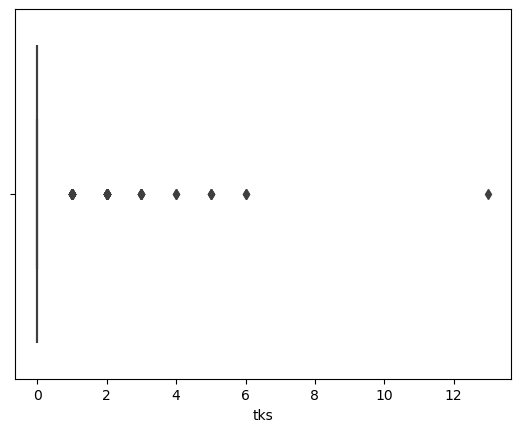

nora_max_mcgperml
skwed 3.0817657508414324


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


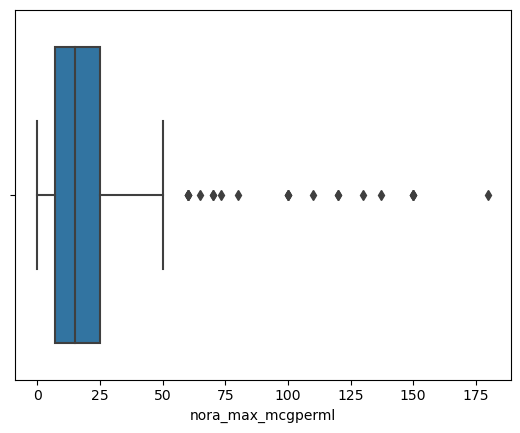

dobutamin_maxmcgpermin
skwed 1.2819862820623655


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


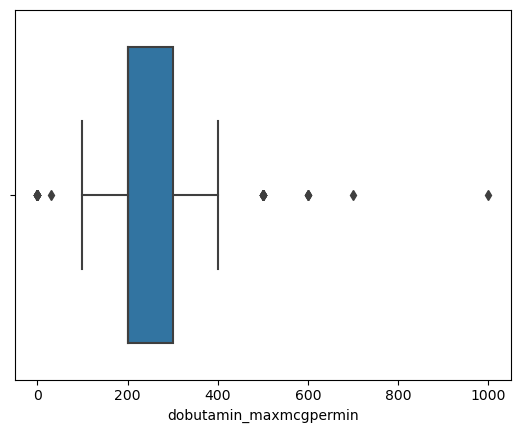

adrelin_max_mcgpermin
skwed 4.952749558687234


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


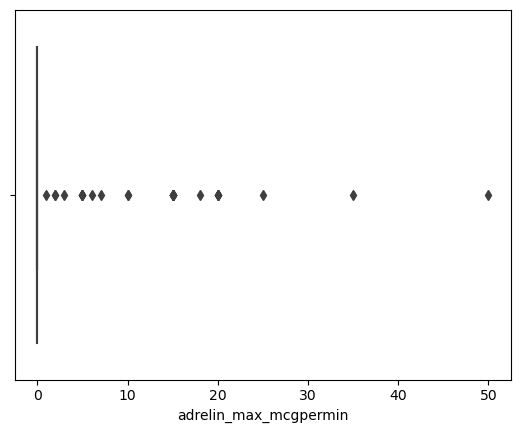

milrinon_max_mcgperh
skwed 2.442054538586967


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


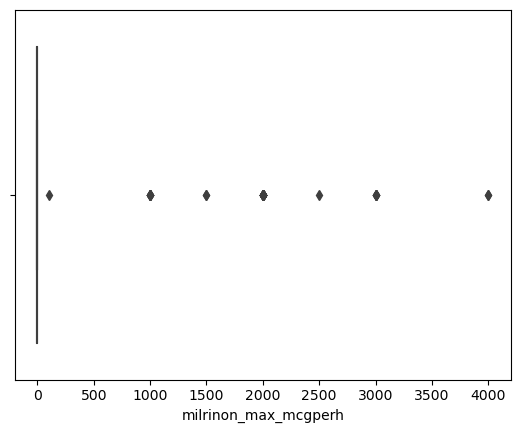

vasopressin_max_uperh
skwed 4.5764740047251715


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


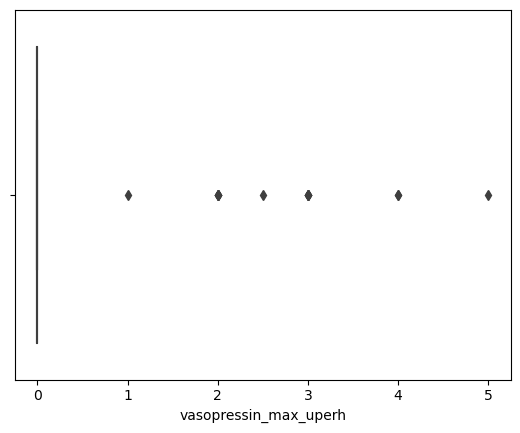

hlm_bilanz_l
skwed 1.0036065565322043


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


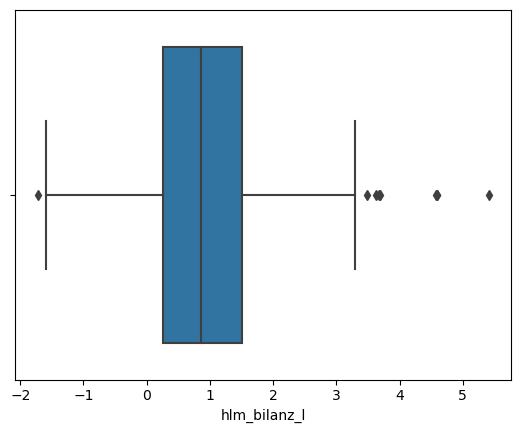

hlm_zeit_min
skwed 0.4001033085877925


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


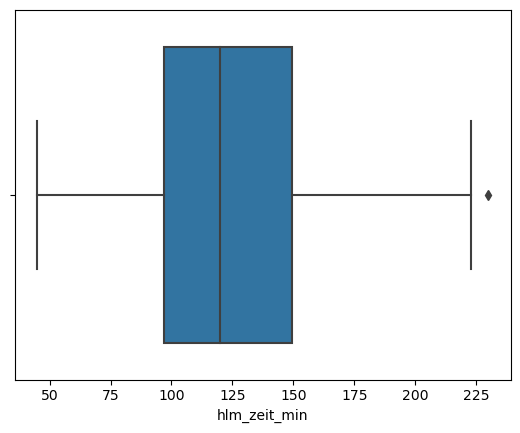

icu_max_postop_plusbilanz_ml
skwed 1.732475592314023


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


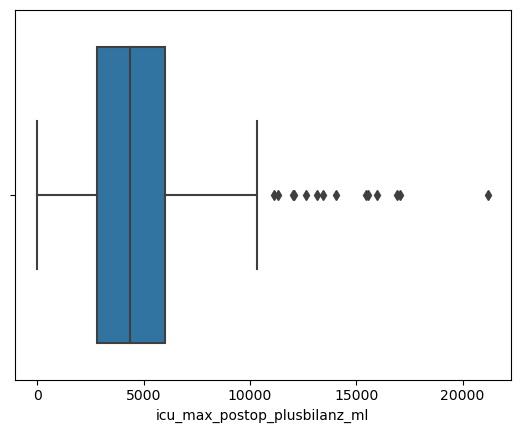

icu_max_postop_plusbilanz_l
skwed 1.7324756048582544


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


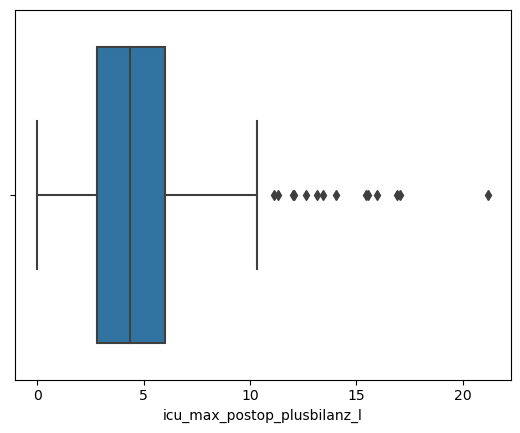

icu_tage
skwed 2.8953947104049127


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


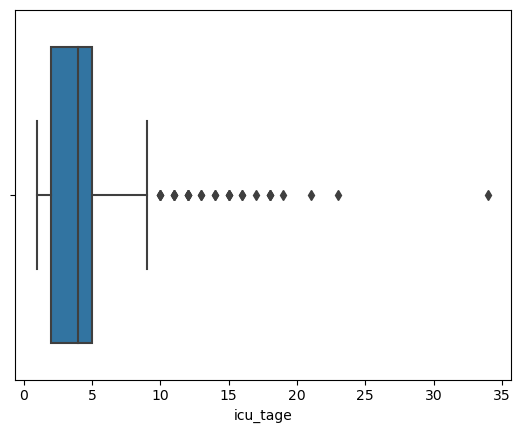

gesamtbilanz_l
skwed 1.6831981946599697


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


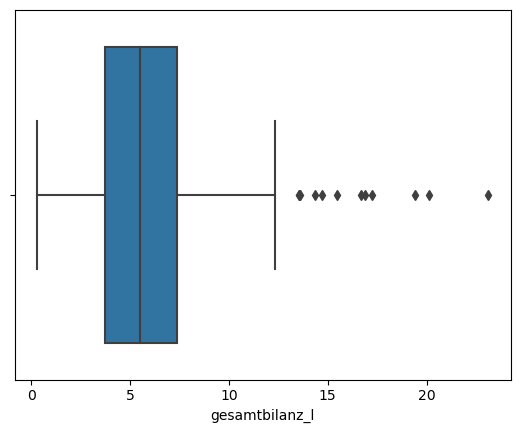

durchschnitts_bilanz_tag_l
skwed 1.3597802348629109


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


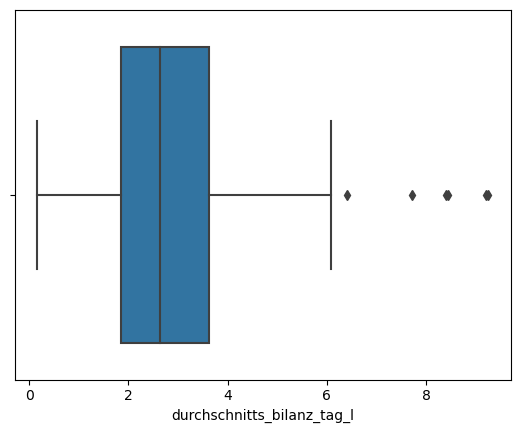

bilanz_pro_kg_lkg
skwed 1.8094380921417528


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


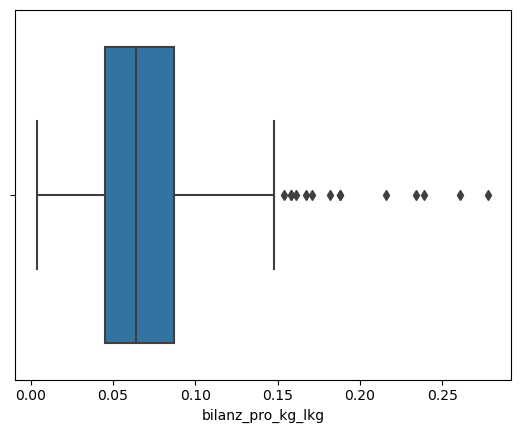

pm_dependency_ja1
skwed 7.013630261791015


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


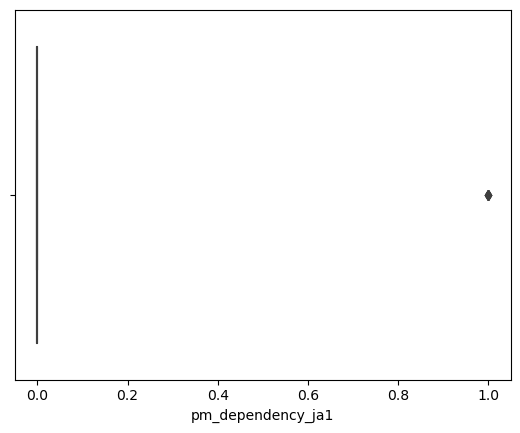

mean_eigenfrequenz_bpm
skwed -0.12383614903938116


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


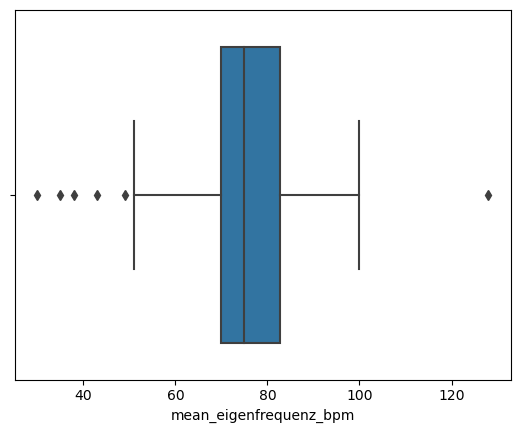

avblock_aa_vhf_vhflattern_ja1
skwed 0.5496544611745955


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


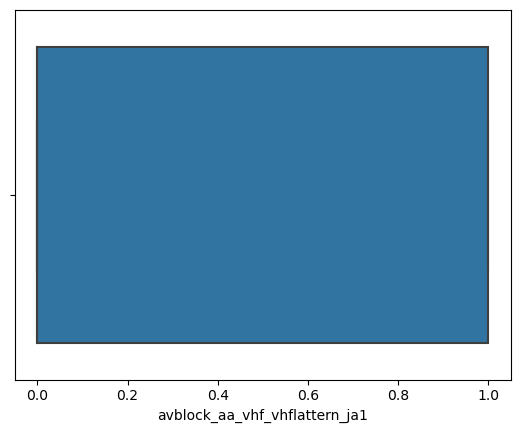

ves_vf_ja1
skwed 3.3974067896392843


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


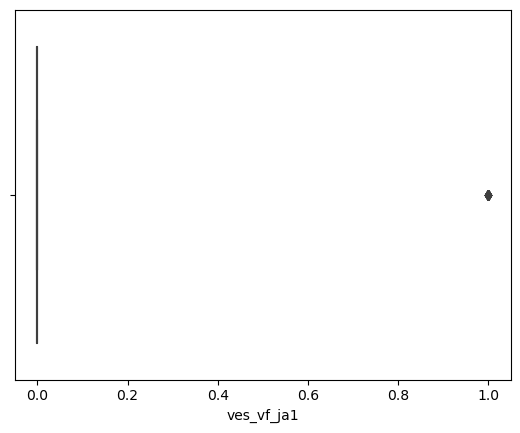

amiodaron_digitoxin_rhythmonorm_ja1
skwed 1.079605337914135


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


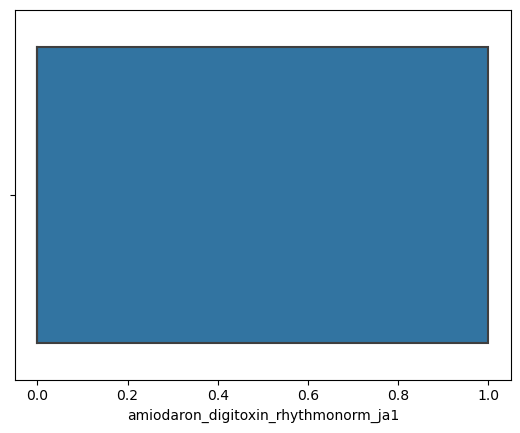

levosemendan_ja1
skwed 11.26890705848412


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


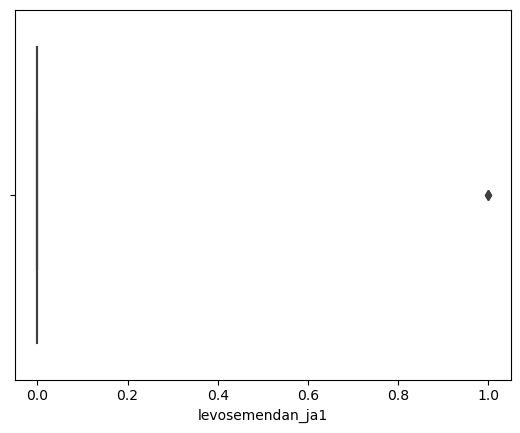

C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


cam_ja1
skwed 0.9272653433110378


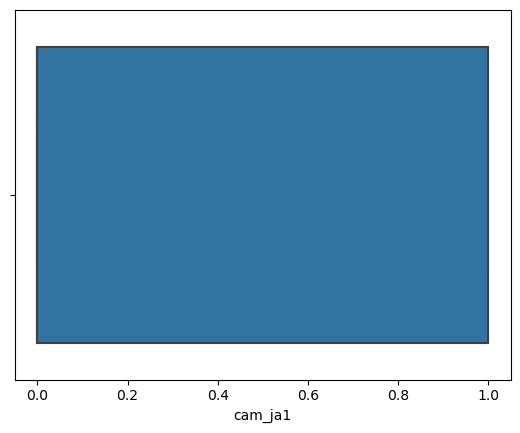

delir_dauer_tage
skwed 1.3546519978440132


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


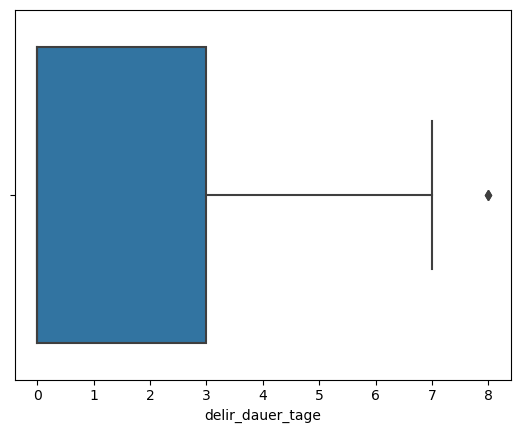

therapie_relevantes_delir_ja1
skwed 1.4088631210863318


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


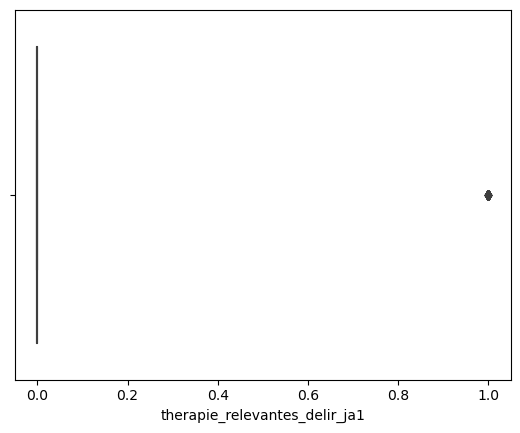

attest_ja1
skwed 1.012615243829162


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


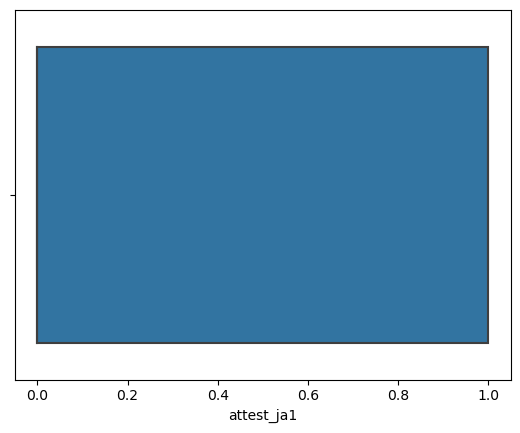

whs_ja1
skwed 2.0862709223268445


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


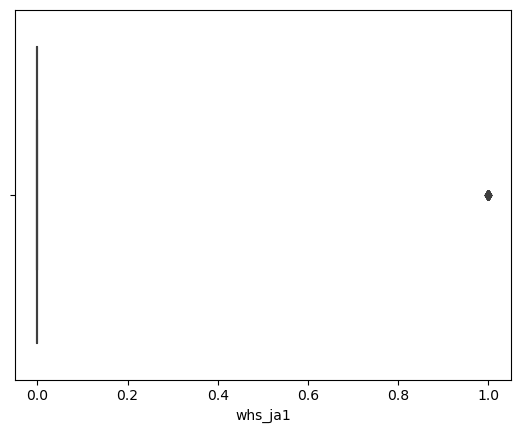

hb_preop_gperdl
skwed -0.7599007014659491


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


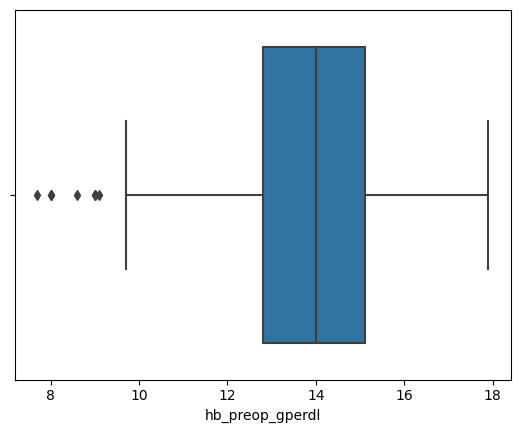

hb_max_postop_gperdl
skwed 0.5181074680327654


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


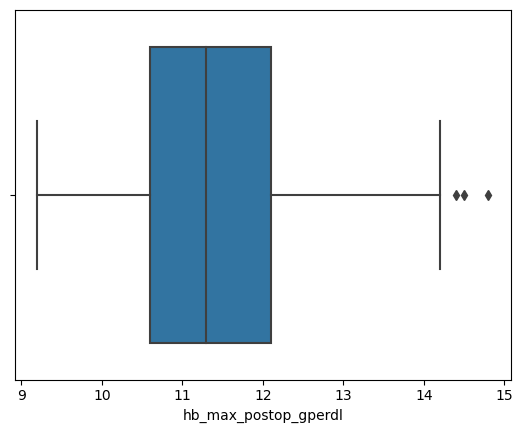

C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


hb_min_postop_gperdl
skwed 0.9432404547896154


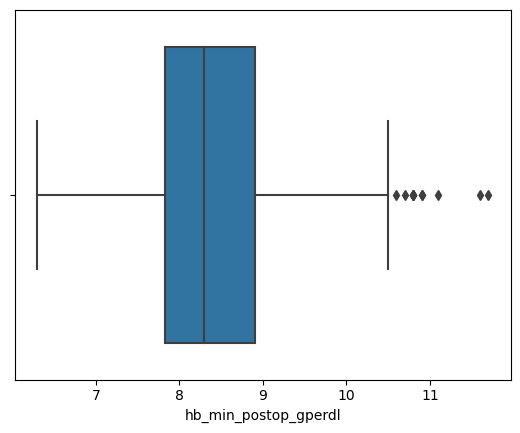

haematokrit_preop_percent
skwed -0.5997398753344899


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


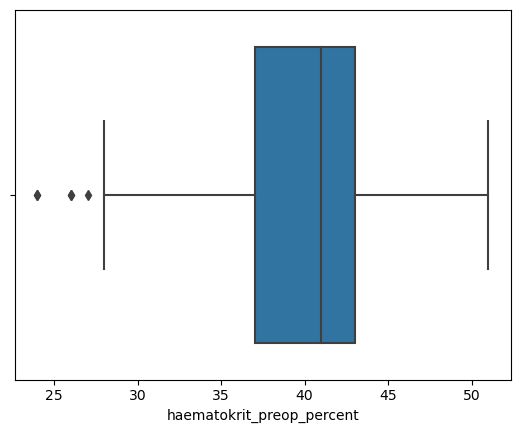

haematokrit_max_postop_percent
skwed 0.5598372925362688


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


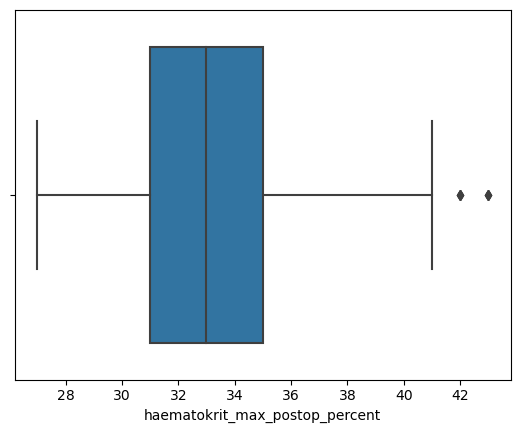

haematokrit_min_postop_percent
skwed 0.7691521420638566


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


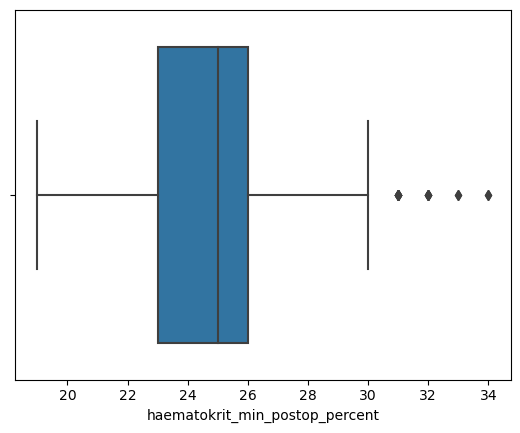

tropi_preop_ngperml
skwed 8.017939752687314


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


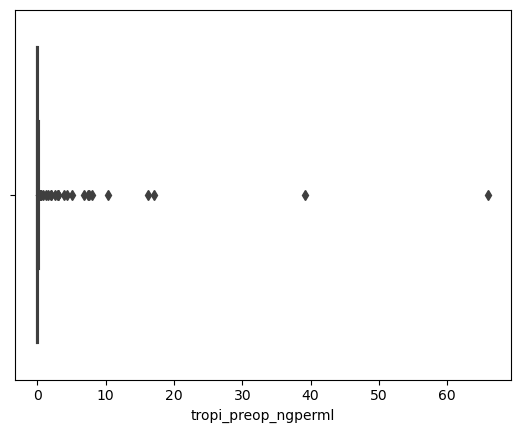

tropi_max_postop_ngperml
skwed 10.681067267452653


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


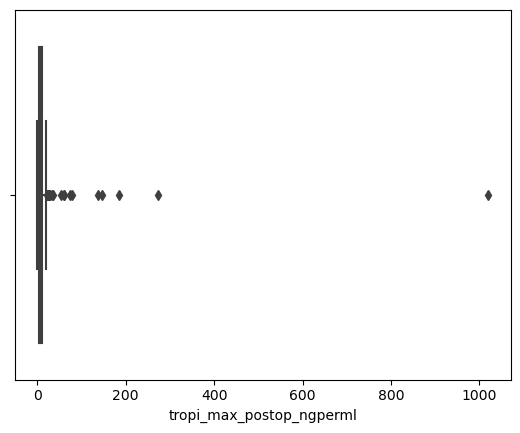

tropi_min_postop_ngperml
skwed 11.255763778131398


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


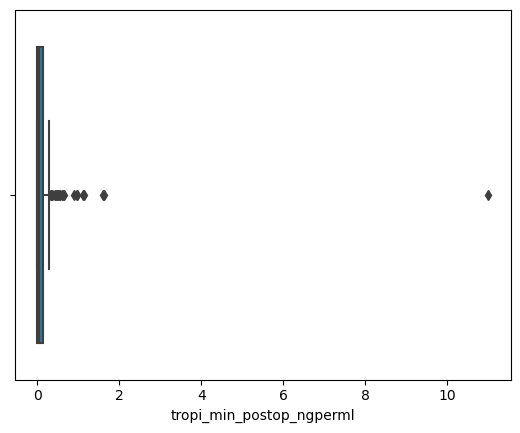

TropT_preOP_ngPERL
skwed 2.456157690546701


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


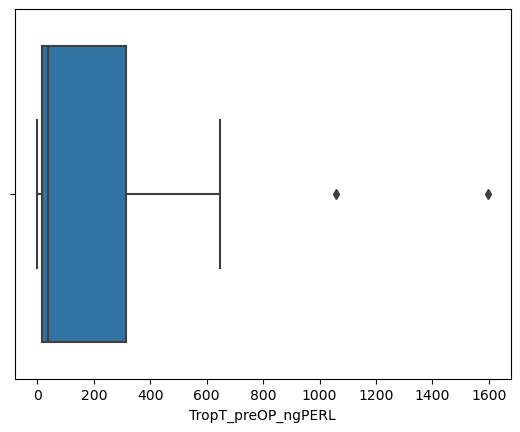

tropt_max_postop_ngperl
skwed 3.481968137692749


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


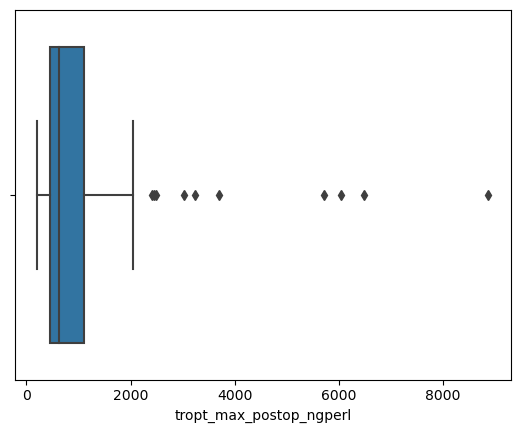

tropt_min_postop_ngperl
skwed 2.2666186867641844


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


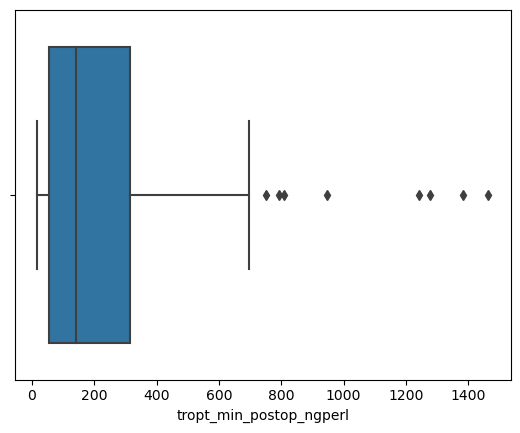

ckmb_preop_mcgperl
skwed 6.6021282514766035


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


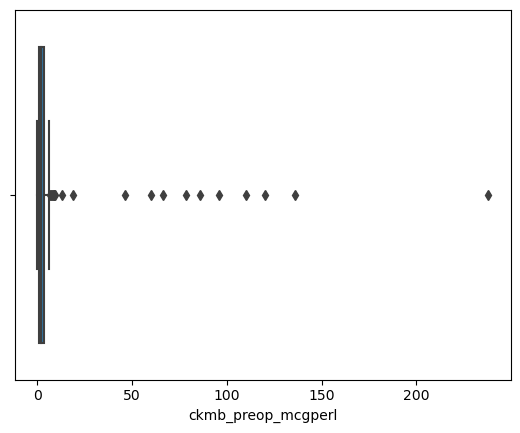

ckmb_max_postop_mcgperl
skwed 8.477235181416555


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


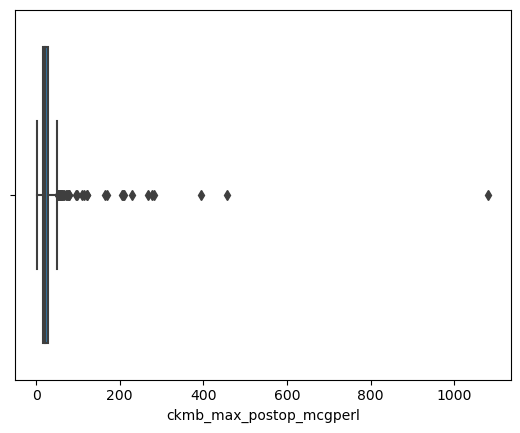

C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ckmb_min_postop_mcgperl
skwed 5.95717848972312


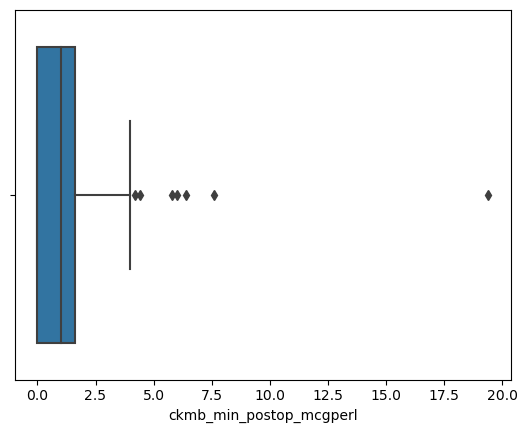

C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ck_preop_uperl
skwed 3.721794340560605


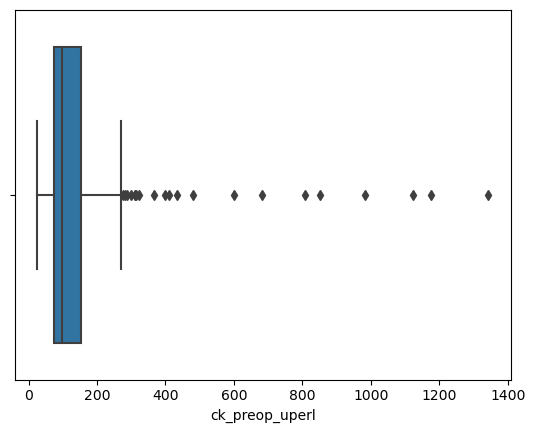

ck_max_postop_uperl
skwed 5.423277838563496


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


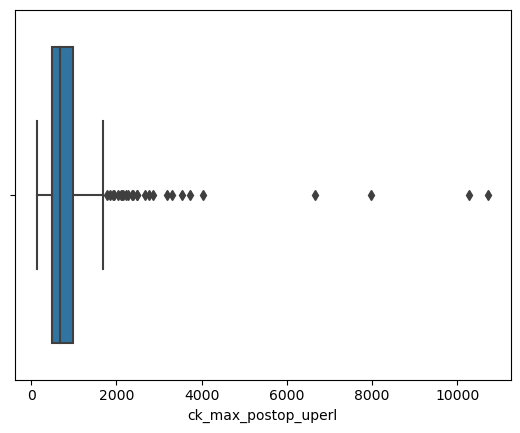

ck_min_postop_uperl
skwed 1.568330169628464


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


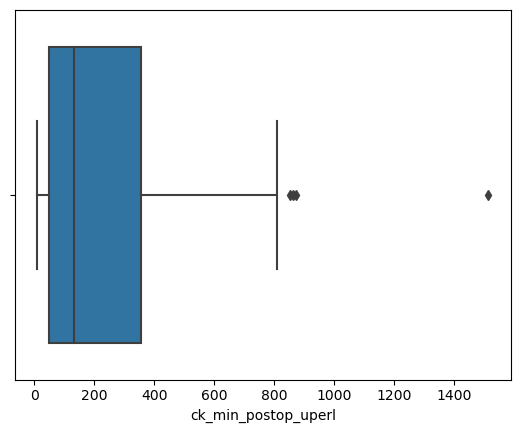

crp_preop_mgperl
skwed 4.375714176372573


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


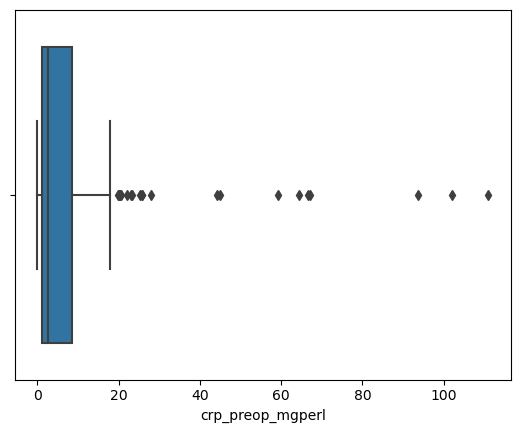

crp_max_postop_mgperl
skwed 0.32566847528018916


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


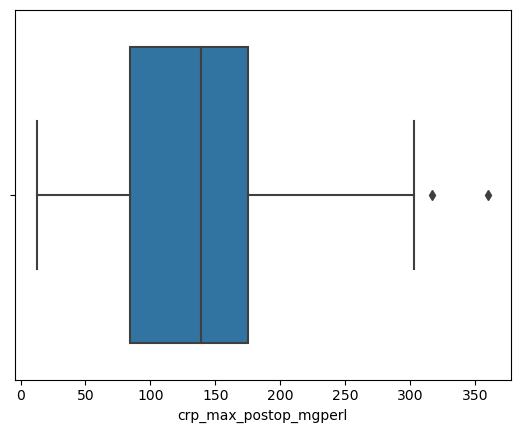

crp_min_postop_mgperl
skwed 1.546892896427792


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


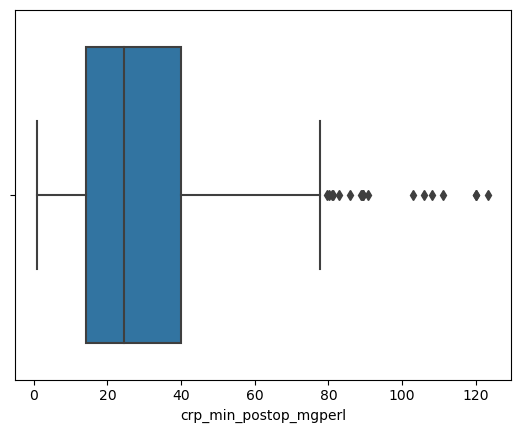

kreatinin_preop_mgperdl
skwed 12.63363195952126


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


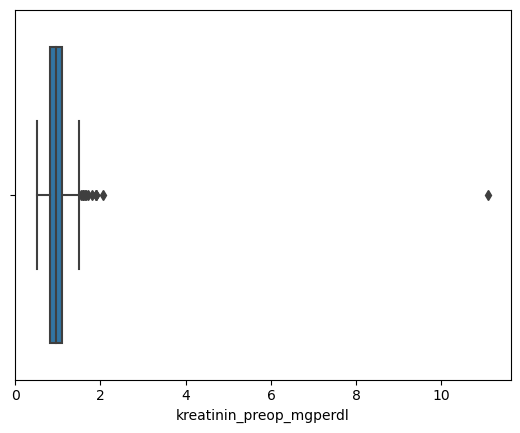

krea_max_postop_mgperdl
skwed 5.088798111268646


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


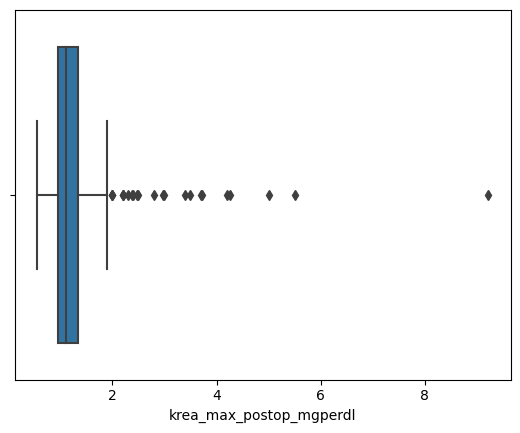

krea_min_postop_mgperdl
skwed 6.859292978585909


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


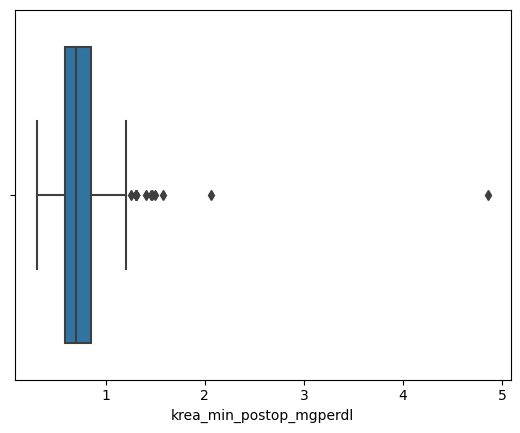

thrombos_preop
skwed 0.43919593427971476


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


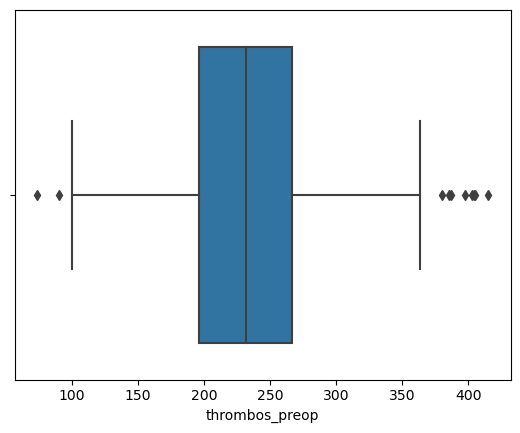

thrombos_max_postop
skwed 0.4743361935755585


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


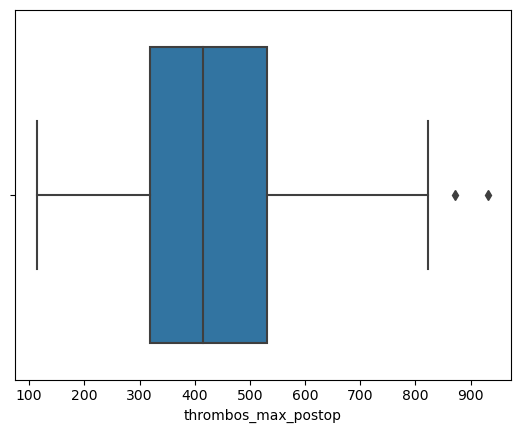

thrombos_min_postop
skwed 0.4091917474983765


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


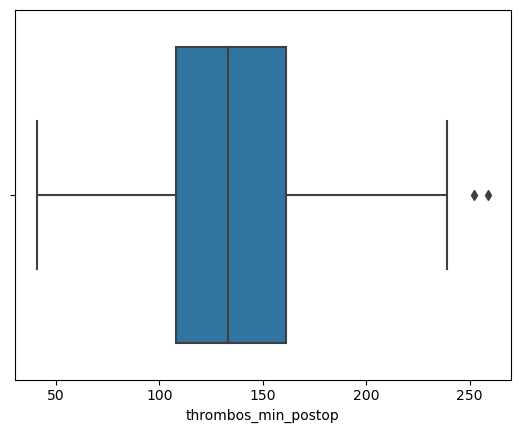

sonstige_neurol_krankheiten
skwed 11.29107222570101


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


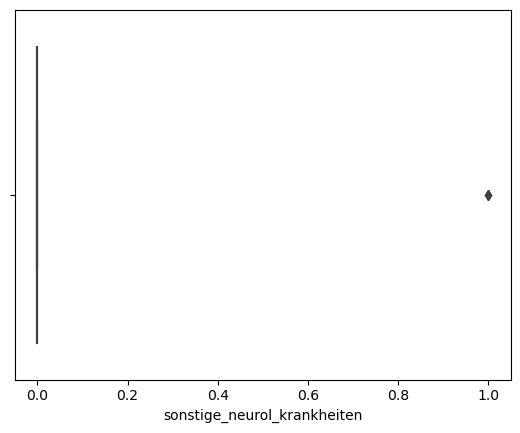

apoplex_in_der_vorgeschichte
skwed 3.653231672166682


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


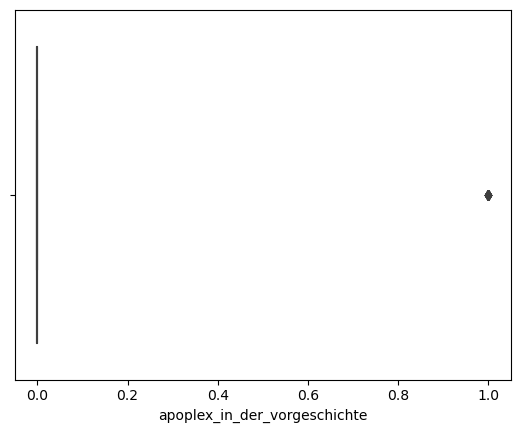

alzheimer_demenz_in_der_vorgesch
skwed 0


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


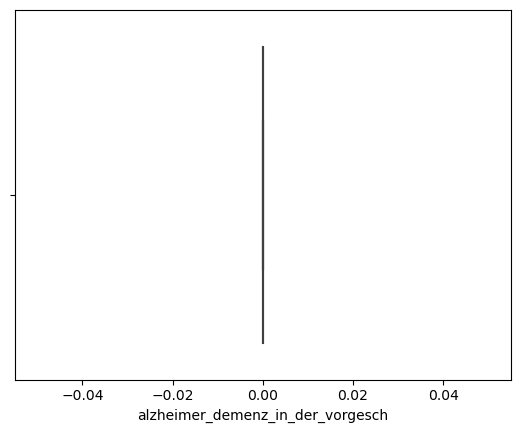

carotisstenose
skwed 2.294610468157208


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


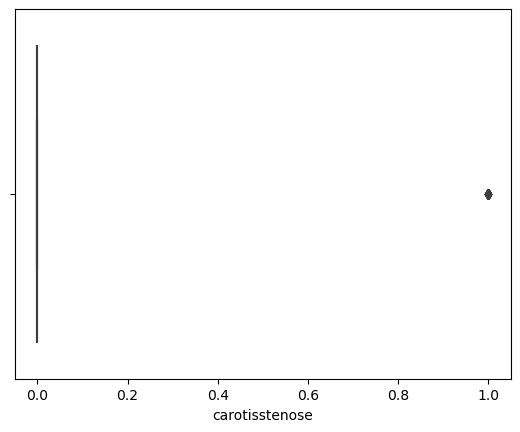

cortison_oder_mtx
skwed 16.06237840420901


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


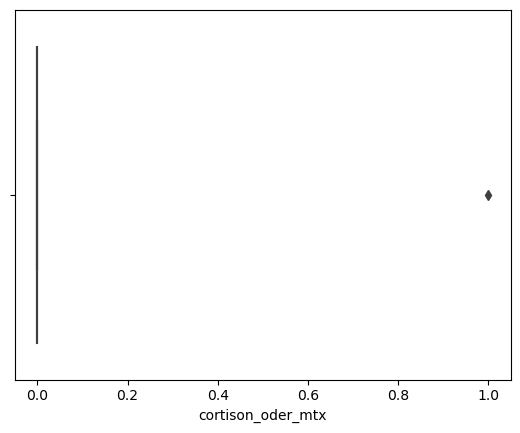

beatmungsdauer_icu_stunden
skwed 4.049326267243267


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


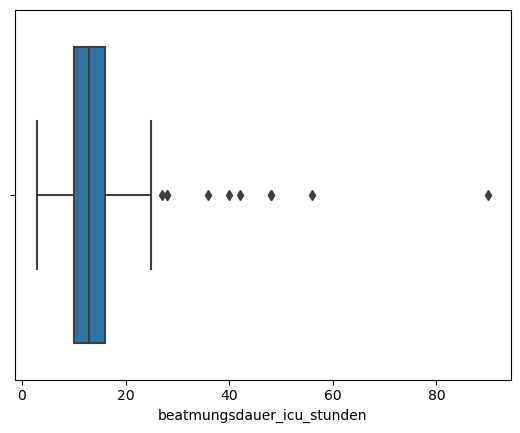

age_at_surg
skwed -0.26246947607989257


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


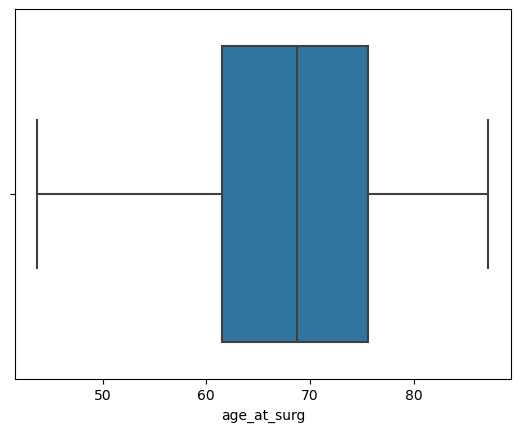

In [15]:
for col in numerical_features:
     visulization_num_with_target(df, col)

In [16]:
#verstorben_1, nyha, gender_m1, KHK_1_2_3, a_ht, hyperlipidemie, familiaere_disposition,
#male_1, gesamt_cvrf, mamaria_ja1, doppelmamaria_ja1, opcab_ja1, komplikationen_ja1, tks, adrelin_max_mcgpermin, milrinon_max_mcgperh
#vasopressin_max_uperh, pm_dependency_ja1, ves_vf_ja1, levosemendan_ja1, therapie_relevantes_delir_ja1, whs_ja1, sonstige_neurol_krankheiten,apoplex_in_der_vorgeschichte,alzheimer_demenz_in_der_vorgesch,alzheimer_demenz_in_der_vorgesch, carotisstenose, cortison_oder_mtx  check as catogerical
#creatinine_clearance, log_euroscore_perc,gewicht_kg, bmi_kgperm2,eks, ffps, nora_max_mcgperml, icu_max_postop_plusbilanz_ml, icu_max_postop_plusbilanz_l , gesamtbilanz_l, durchschnitts_bilanz_tag_l,beatmungsdauer_icu_stunden, icu_tage, bilanz_pro_kg_lkg, hb_max_postop_gperdl, hb_min_postop_gperdl, haematokrit_max_postop_percent,haematokrit_min_postop_percent, tropi_preop_ngperml, tropi_min_postop_ngperml, TropT_preOP_ngPERL, tropt_max_postop_ngperl, tropt_min_postop_ngperl, ckmb_preop_mcgperl, ckmb_max_postop_mcgperl, ckmb_min_postop_mcgperl, ck_preop_uperl, crp_preop_mgperl, crp_max_postop_mgperl, crp_min_postop_mgperl, kreatinin_preop_mgperdl, kreatinin_preop_mgperdl ck_max_postop_uperl, ck_min_postop_uperl, krea_min_postop_mgperdl, thrombos_max_postop, thrombos_min_postop outliers 
#'height_cm , thrombos_preop ,hlm_bilanz_l,anzahl_der_bypaesse,hb_preop_gperdl, mean_eigenfrequenz_bpm , haematokrit_preop_percent' range  

avblock_aa_vhf_vhflattern_ja1
cam_ja1
anzahl_der_bypaesse
dm
nikotibusus
amiodaron_digitoxin_rhythmonorm_ja1
attest_ja1
adipositas
delir_dauer_tage,  dobutamin_maxmcgpermin  #one hot


In [143]:
check_as_catogerical= ['verstorben_1', 'nyha', 'gender_m1', 'KHK_1_2_3', 'a_ht', 
                       'hyperlipidemie', 'familiaere_disposition', 'male_1', 'gesamt_cvrf',
                       'mamaria_ja1', 'doppelmamaria_ja1', 'opcab_ja1', 'komplikationen_ja1', 
                       'tks', 'adrelin_max_mcgpermin', 'milrinon_max_mcgperh','vasopressin_max_uperh',
                       'pm_dependency_ja1', 'ves_vf_ja1', 'levosemendan_ja1', 'therapie_relevantes_delir_ja1',
                       'whs_ja1', 'sonstige_neurol_krankheiten','apoplex_in_der_vorgeschichte',
                       'alzheimer_demenz_in_der_vorgesch','alzheimer_demenz_in_der_vorgesch',
                       'carotisstenose', 'cortison_oder_mtx','avblock_aa_vhf_vhflattern_ja1','cam_ja1','anzahl_der_bypaesse',
                       'dm','nikotibusus','amiodaron_digitoxin_rhythmonorm_ja1','attest_ja1','adipositas',
                       'delir_dauer_tage','dobutamin_maxmcgpermin']
                       

go on with these features as catogrtical

In [144]:
for col in check_as_catogerical:
        print(df[col].value_counts())

0    251
1     13
Name: verstorben_1, dtype: int64
3    167
2     56
4     31
1     10
Name: nyha, dtype: int64
1.0    215
0.0     43
Name: gender_m1, dtype: int64
3.0    214
2.0     40
1.0      4
Name: KHK_1_2_3, dtype: int64
1.0    244
0.0     14
Name: a_ht, dtype: int64
1.0    196
0.0     62
Name: hyperlipidemie, dtype: int64
0.0    216
1.0     42
Name: familiaere_disposition, dtype: int64
1.0    215
0.0     43
Name: male_1, dtype: int64
4.0    82
3.0    67
5.0    53
2.0    29
6.0    16
1.0     6
7.0     5
Name: gesamt_cvrf, dtype: int64
1.0    246
0.0     12
Name: mamaria_ja1, dtype: int64
0.0    235
1.0     23
Name: doppelmamaria_ja1, dtype: int64
0.0    248
1.0     10
Name: opcab_ja1, dtype: int64
0.0    221
1.0     37
Name: komplikationen_ja1, dtype: int64
0.0     203
1.0      22
2.0      19
3.0       6
5.0       3
4.0       2
6.0       2
13.0      1
Name: tks, dtype: int64
0.0     230
15.0      8
5.0       4
20.0      4
2.0       2
10.0      2
7.0       1
25.0      1
6.0       

In [145]:
for col in check_as_catogerical:
    Rel_chi_square(df, col, 'therapie_relevantes_delir_ja1')

verstorben_1
Chi-square statistic: 17.67951643528885
p-value: 2.6142670854122448e-05
nyha
Chi-square statistic: 7.380436360907899
p-value: 0.060711461576894936
gender_m1
Chi-square statistic: 1.1831258396775626
p-value: 0.27672055427477704
KHK_1_2_3
Chi-square statistic: 0.07776789114849048
p-value: 0.9618623310496186
a_ht
Chi-square statistic: 0.10569711722501846
p-value: 0.7450971164947477
hyperlipidemie
Chi-square statistic: 2.321869323838631
p-value: 0.12756664263379563
familiaere_disposition
Chi-square statistic: 2.0221498944405365
p-value: 0.15501952491563648
male_1
Chi-square statistic: 1.1831258396775626
p-value: 0.27672055427477704
gesamt_cvrf
Chi-square statistic: 3.984526704691006
p-value: 0.6787704885208715
mamaria_ja1
Chi-square statistic: 1.9648078162375895
p-value: 0.1610000631896552
doppelmamaria_ja1
Chi-square statistic: 0.5602507174155392
p-value: 0.4541592423564369
opcab_ja1
Chi-square statistic: 0.0
p-value: 1.0
komplikationen_ja1
Chi-square statistic: 5.92521487612

If the p-value is below a certain significance level (e.g., 0.05), it suggests a statistically significant relationship between the variables.

* cortison_oder_mtx
* carotisstenose
* alzheimer_demenz_in_der_vorgesch
* apoplex_in_der_vorgeschichte
* sonstige_neurol_krankheiten
* ves_vf_ja1
* pm_dependency_ja1
* opcab_ja1
* doppelmamaria_ja1
* mamaria_ja1
* gesamt_cvrf
* male_1
* familiaere_disposition
* hyperlipidemie
* a_ht
* KHK_1_2_3
* gender_m1
* anzahl_der_bypaesse
* dm
* nikotibusus
* adipositas




# Outliers transformation 

In [146]:
def apply_log_transformation(df, columns):
    """
    Apply logarithmic transformation to specified columns in a DataFrame.

    Parameters:
        df (pandas.DataFrame): The input DataFrame.
        columns (list): A list of column names to be transformed.

    Returns:
        pandas.DataFrame: A new DataFrame with specified columns logarithmically transformed.

    Example:
        data = {'Column1': [1, 2, 3, 4, 5],
                'Column2': [10, 20, 30, 40, 50]}
        df = pd.DataFrame(data)
        transformed_data = apply_log_transformation(df, ['Column1'])
        print(transformed_data)

    """
    # Copy the DataFrame to avoid modifying the original data
    transformed_df = df.copy()

    # Apply logarithmic transformation to the specified columns
    for column in columns:
        transformed_df[column] = np.log(transformed_df[column]+1)

    return transformed_df


In [147]:
def handle_outliers(df, columns, factor=1.5):
    """
    Handle outliers in specific columns of a DataFrame using higher and lower bounds based on the 5-number summary.

    Parameters:
        df (pandas.DataFrame): The input DataFrame.
        columns (list): A list of column names to handle outliers.
        factor (float): The factor to multiply the interquartile range (IQR) for determining the bounds.
                        By default, it is set to 1.5.

    Returns:
        pandas.DataFrame: The DataFrame with outliers replaced by the corresponding higher or lower bound.

    Example:
        data = {'Column1': [10, 15, 20, 25, 200],
                'Column2': [5, 8, 12, 18, 120]}
        df = pd.DataFrame(data)
        processed_df = handle_outliers(df, ['Column1'])
        print(processed_df)

    """
    processed_df = df.copy()

    for column in columns:
        data = processed_df[column].copy()
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        iqr = q3 - q1
        lower_bound = q1 - factor * iqr
        upper_bound = q3 + factor * iqr

        processed_df[column] = np.where((data < lower_bound) | (data > upper_bound),
                                        np.clip(data, lower_bound, upper_bound),
                                        data)

    return processed_df

In [148]:
trasnformation_columns = ['creatinine_clearance', 'log_euroscore_perc','gewicht_kg', 'bmi_kgperm2','eks',
                   'ffps', 'nora_max_mcgperml', 'icu_max_postop_plusbilanz_ml', 'icu_max_postop_plusbilanz_l', 
                   'gesamtbilanz_l', 'durchschnitts_bilanz_tag_l','beatmungsdauer_icu_stunden', 'icu_tage', 
                   'bilanz_pro_kg_lkg', 'hb_max_postop_gperdl', 'hb_min_postop_gperdl', 'haematokrit_max_postop_percent',
                   'haematokrit_min_postop_percent', 'tropi_preop_ngperml', 'tropi_min_postop_ngperml', 'TropT_preOP_ngPERL',
                   'tropt_max_postop_ngperl', 'tropt_min_postop_ngperl', 'ckmb_preop_mcgperl', 'ckmb_max_postop_mcgperl', 
                   'ckmb_min_postop_mcgperl', 'ck_preop_uperl', 'crp_preop_mgperl', 'crp_max_postop_mgperl', 'crp_min_postop_mgperl',
                   'kreatinin_preop_mgperdl', 'kreatinin_preop_mgperdl', 'ck_max_postop_uperl', 'ck_min_postop_uperl',
                   'krea_min_postop_mgperdl', 'thrombos_max_postop', 'thrombos_min_postop']

In [149]:
transformed_df = apply_log_transformation(df, trasnformation_columns)

creatinine_clearance
skwed -1.2051848949576796


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


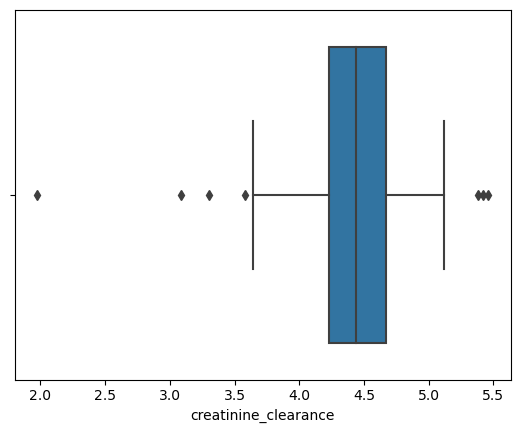

log_euroscore_perc
skwed 5.991057091051549


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


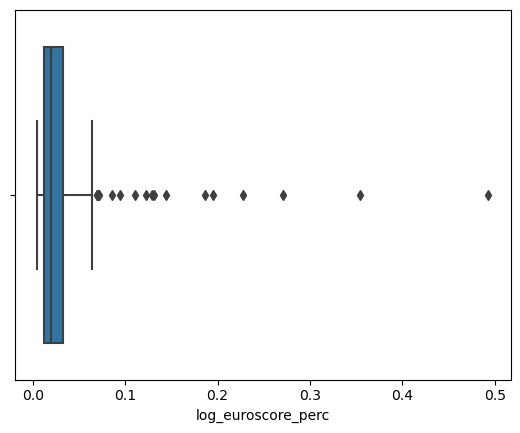

gewicht_kg
skwed 0.30713578549902965


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


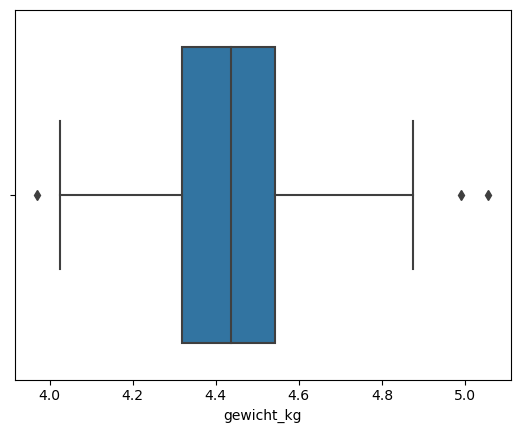

bmi_kgperm2
skwed 0.2973661376138989


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


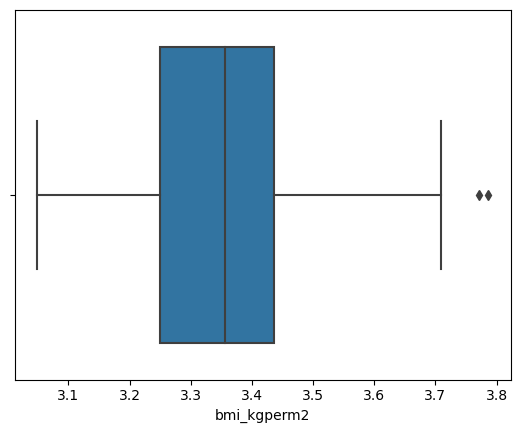

eks
skwed 0.5660924975553135


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


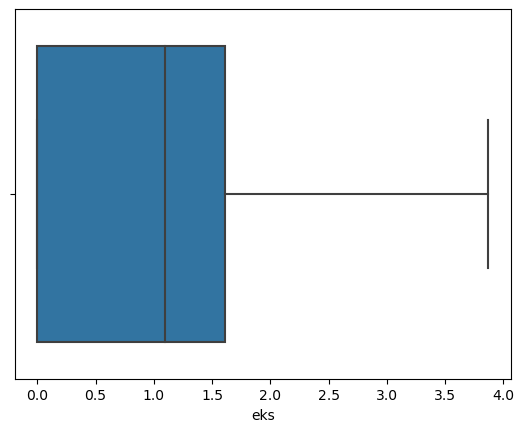

ffps
skwed 1.126783831543017


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


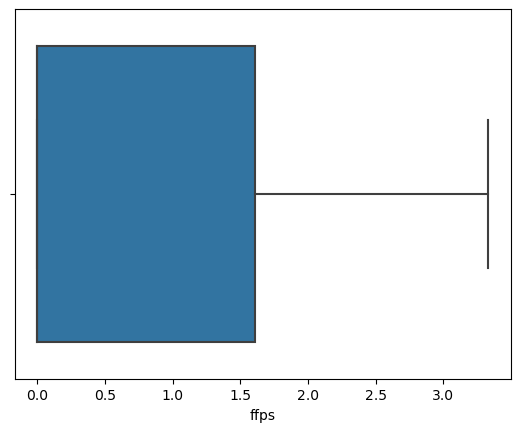

nora_max_mcgperml
skwed -0.019155646272794265


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


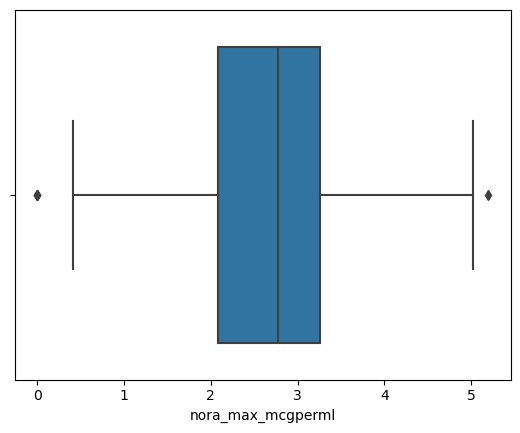

icu_max_postop_plusbilanz_ml
skwed -4.1735584053989


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


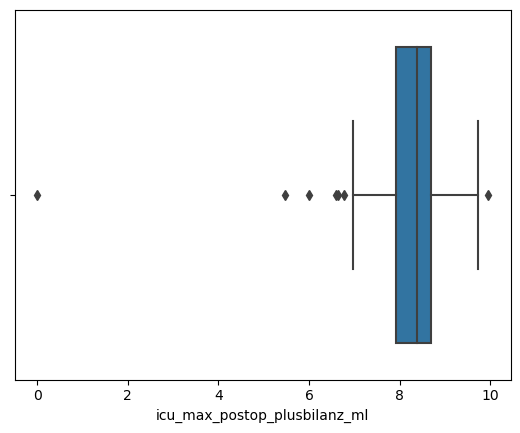

icu_max_postop_plusbilanz_l
skwed -0.047334875015914435


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


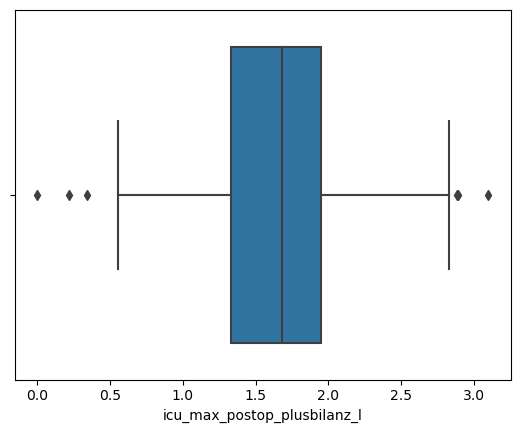

gesamtbilanz_l
skwed -0.21031830316206054


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


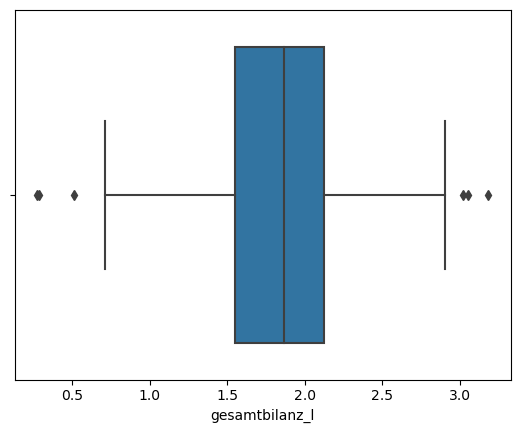

durchschnitts_bilanz_tag_l
skwed 0.1560141729532296


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


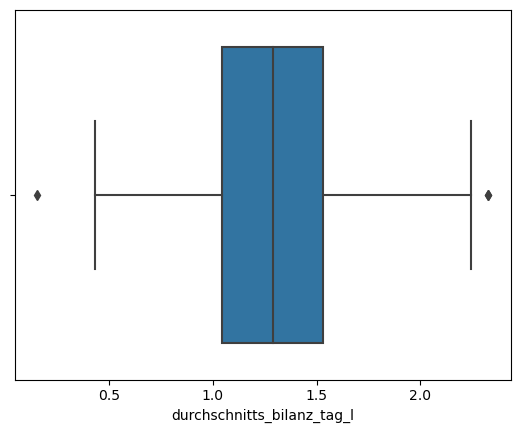

beatmungsdauer_icu_stunden
skwed 0.28864032486233354


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


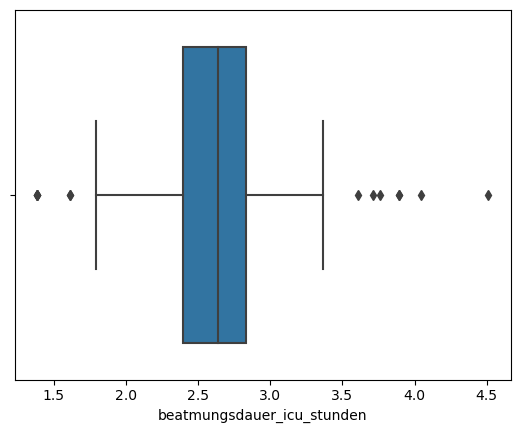

icu_tage
skwed 1.0242737282952061


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


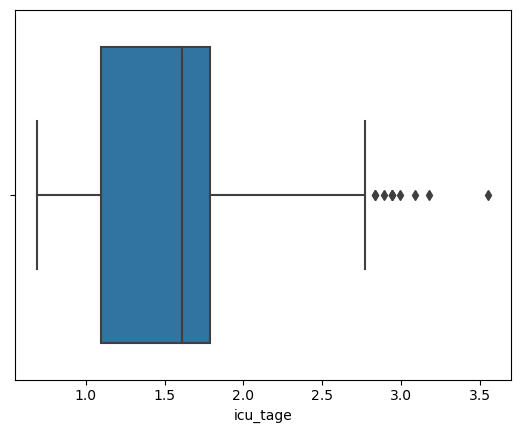

bilanz_pro_kg_lkg
skwed 1.6086301848936375


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


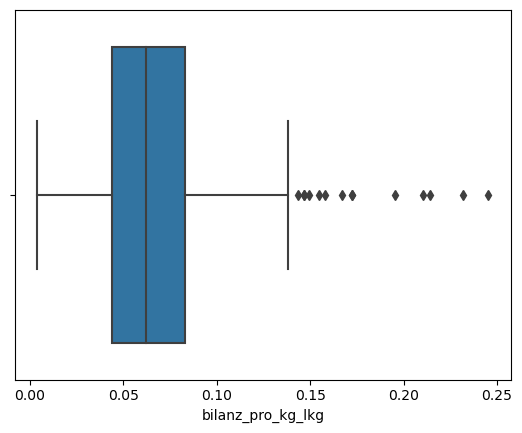

hb_max_postop_gperdl
skwed 0.28358987134473773


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


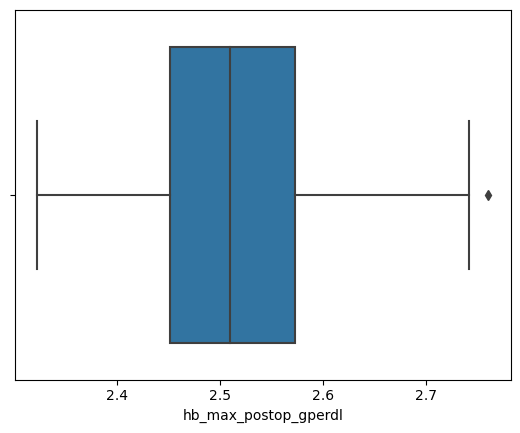

hb_min_postop_gperdl
skwed 0.668838351601581


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


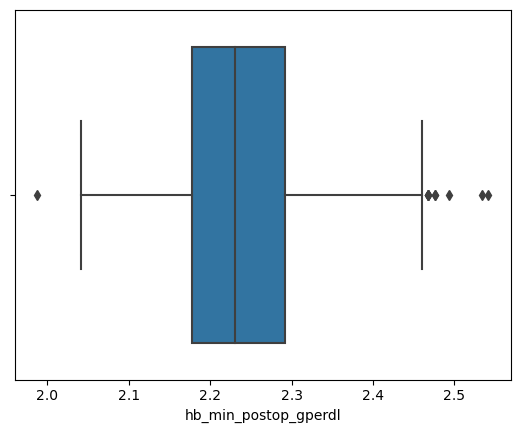

haematokrit_max_postop_percent
skwed 0.29419130061137977


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


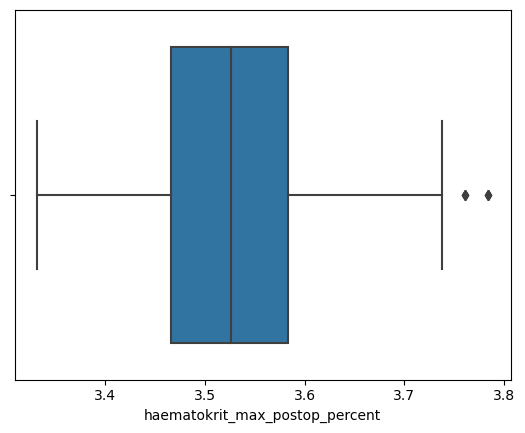

haematokrit_min_postop_percent
skwed 0.45665495555474456


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


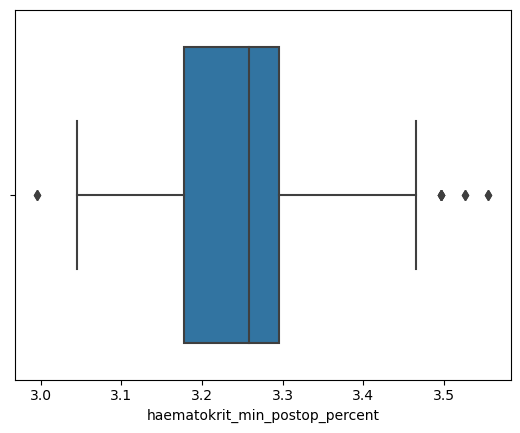

tropi_preop_ngperml
skwed 3.25644469431947


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


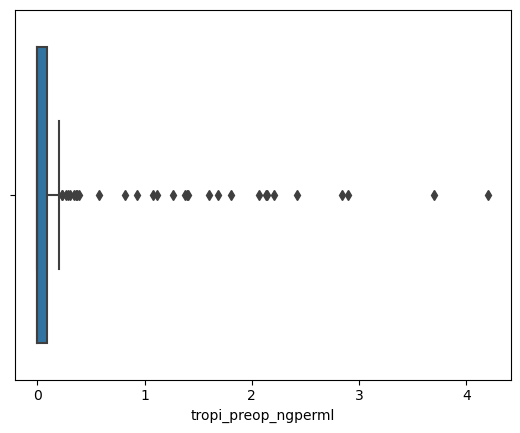

tropi_min_postop_ngperml
skwed 5.527475984373495


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


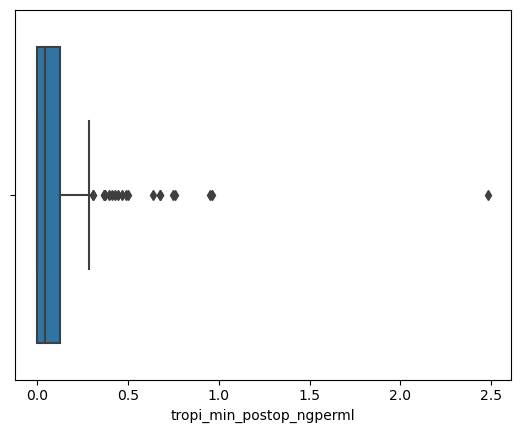

TropT_preOP_ngPERL
skwed 0.027222912628856052


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


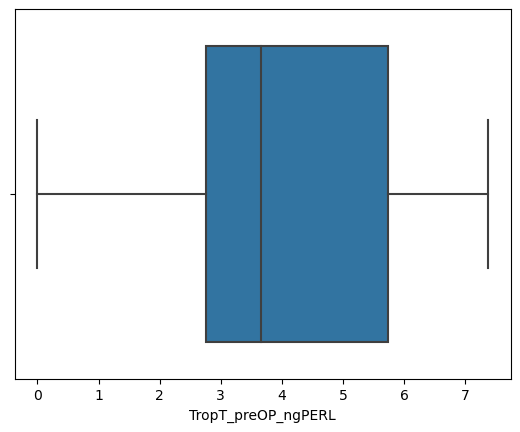

tropt_max_postop_ngperl
skwed 1.0601712721858925


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


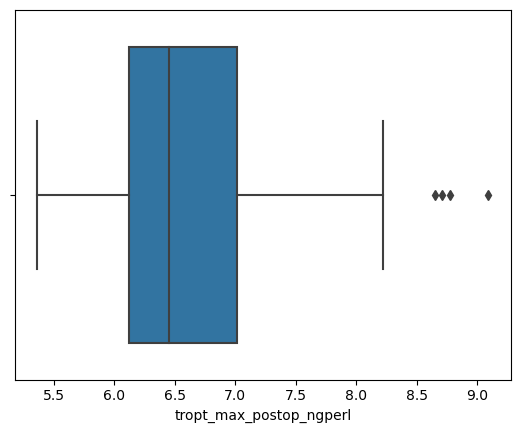

tropt_min_postop_ngperl
skwed 0.25633022443324643


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


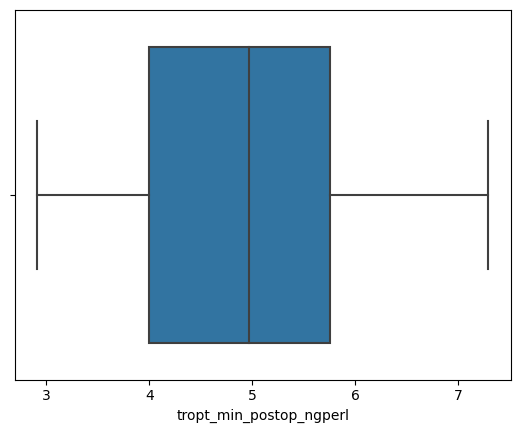

ckmb_preop_mcgperl
skwed 1.8301293631104993


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


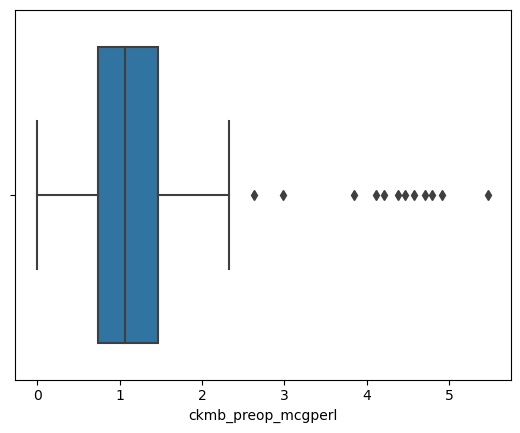

ckmb_max_postop_mcgperl
skwed 1.7216109035022709


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


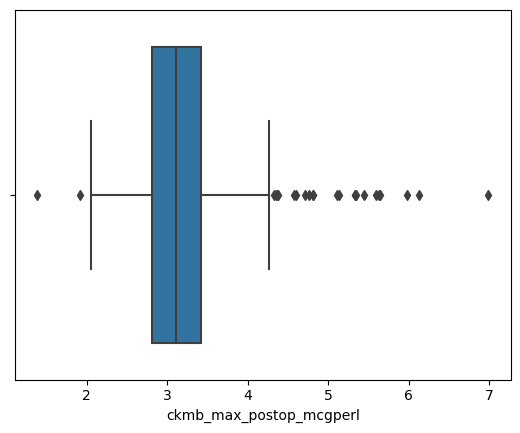

ckmb_min_postop_mcgperl
skwed 0.5608043595824995


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


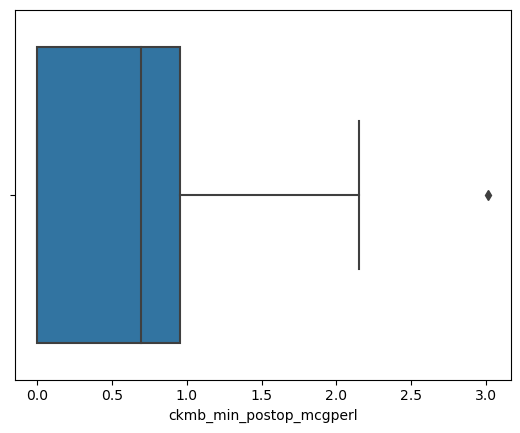

ck_preop_uperl
skwed 1.1741335947251201


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


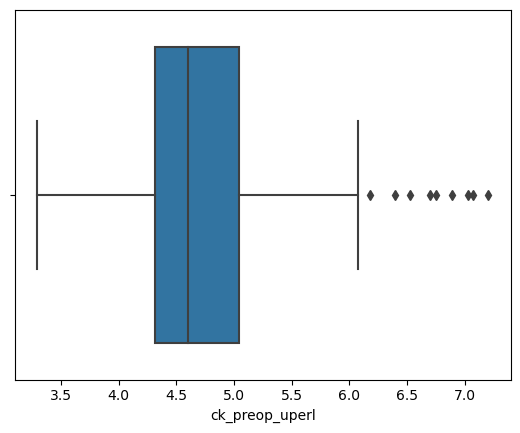

crp_preop_mgperl
skwed 0.9335634445059676


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


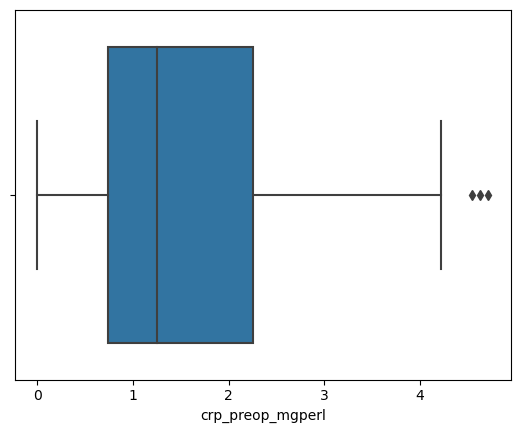

crp_max_postop_mgperl
skwed -0.954253939769008


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


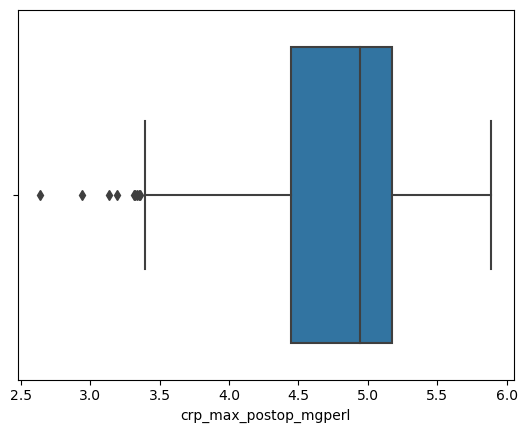

crp_min_postop_mgperl
skwed -0.15518699788163148


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


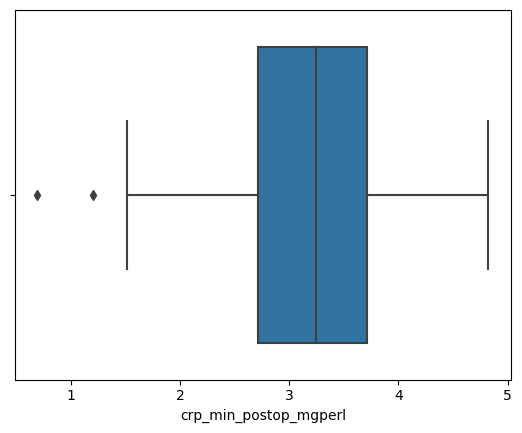

kreatinin_preop_mgperdl
skwed 2.7704245449235865


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


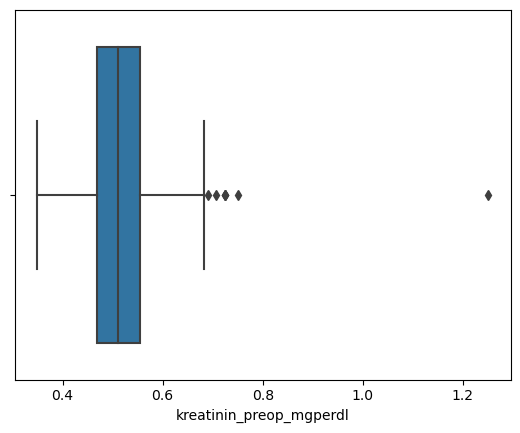

kreatinin_preop_mgperdl
skwed 2.7704245449235865


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


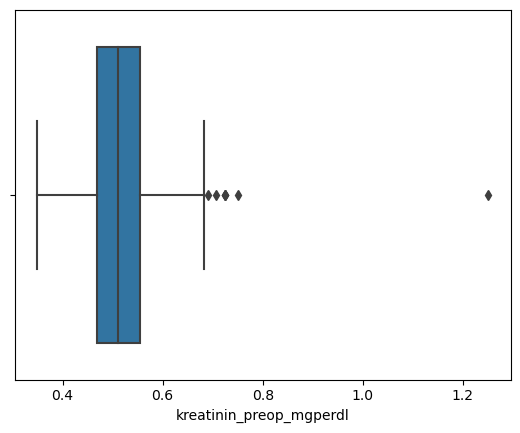

ck_max_postop_uperl
skwed 1.0957279177175236


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


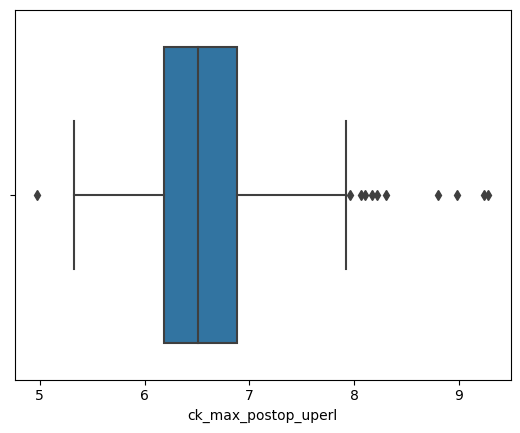

ck_min_postop_uperl
skwed -0.06819812230456747


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


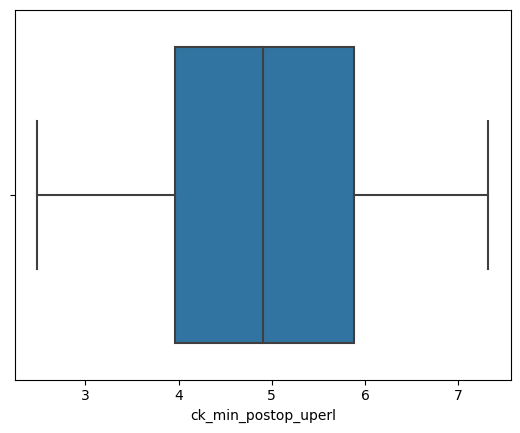

krea_min_postop_mgperdl
skwed 2.711254013610767


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


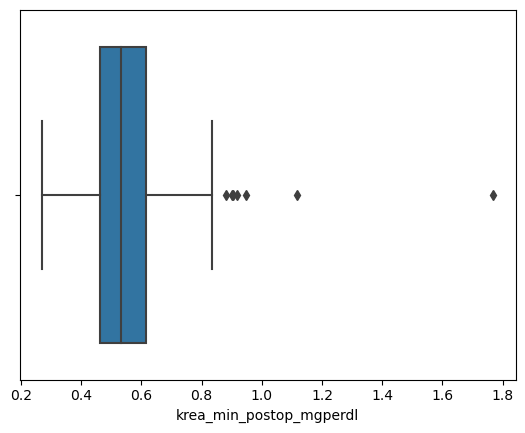

thrombos_max_postop
skwed -0.5156226920771219


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


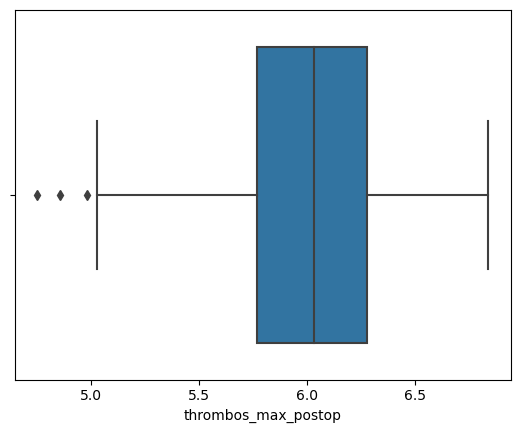

thrombos_min_postop
skwed -0.5420390435000925


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


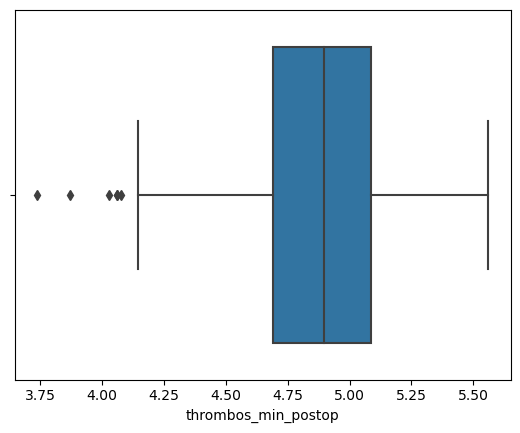

In [63]:
for col in trasnformation_columns:
     visulization_num_with_target(transformed_df, col)

better we can go with rubost scaler later

In [150]:
lower_higher_bound = ['height_cm' , 'thrombos_preop' ,
                      'hlm_bilanz_l','hb_preop_gperdl', 'mean_eigenfrequenz_bpm', 
                      'haematokrit_preop_percent']

In [151]:
transformed_df = handle_outliers(transformed_df, lower_higher_bound, factor=1.5)

height_cm
skwed -0.3668470505435309


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


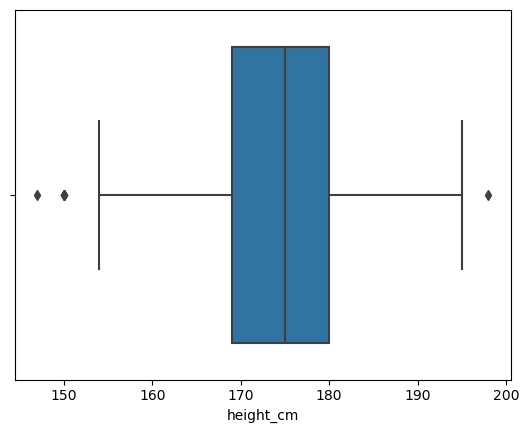

thrombos_preop
skwed 0.43919593427971476


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


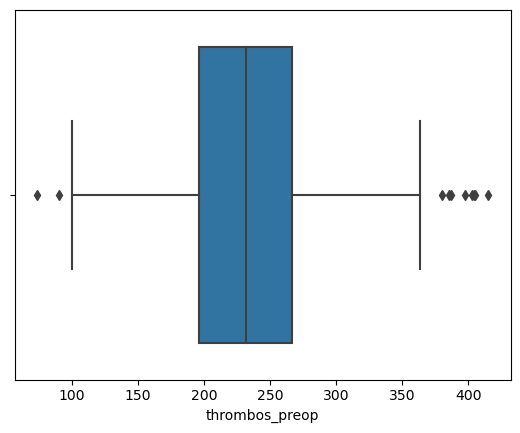

hlm_bilanz_l
skwed 1.0036065565322043


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


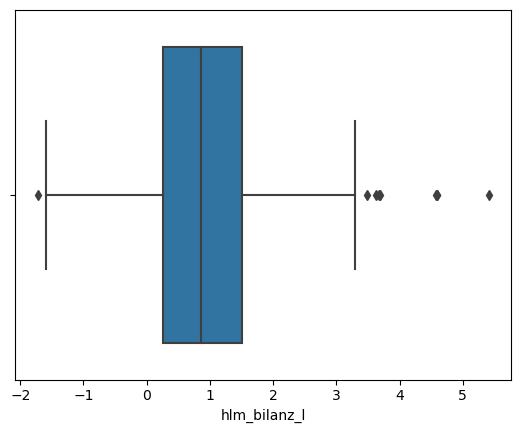

hb_preop_gperdl
skwed -0.7599007014659491


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


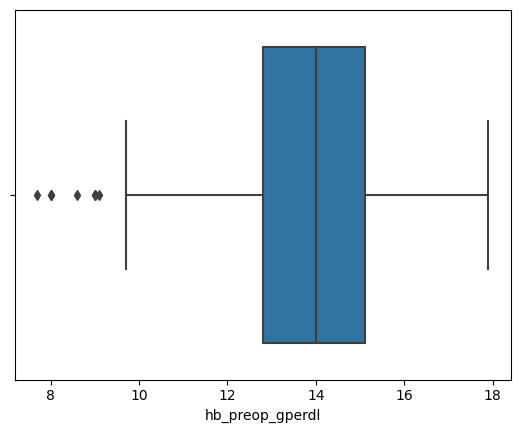

mean_eigenfrequenz_bpm
skwed -0.12383614903938116


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


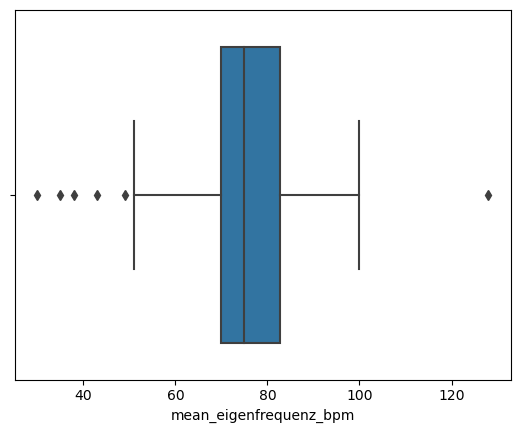

haematokrit_preop_percent
skwed -0.5997398753344899


C:\Users\Badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


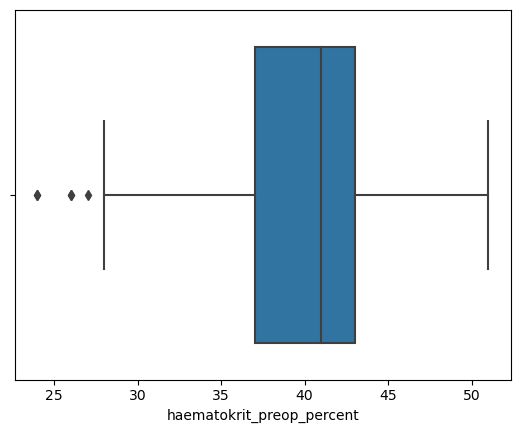

In [152]:
for col in lower_higher_bound:
     visulization_num_with_target(transformed_df, col)

better enough we can go with rubost scaler later

## Target

In [153]:
def calculate_relation(data, target_column, col):
    """
    Calculate the relation between a categorical target variable and a numerical column.

    Parameters:
        data (str): DataFrame
        target_column (str): The name of the categorical target variable column.
        col (str): The name of the numerical column.

    Returns:
        DataFrame: A DataFrame containing the relation between the target variable and the numerical column.
    """    

    # Group the data by the target variable and calculate summary statistics for the numerical column
    relation = data.groupby(target_column)[col].describe()

    return relation


In [154]:
numerical_features_pure = set(numerical_features).difference(set(check_as_catogerical))

In [155]:
for col in numerical_features_pure:
    print(col)
    print(calculate_relation(transformed_df, 'therapie_relevantes_delir_ja1', col))


haematokrit_preop_percent
                               count       mean       std   min    25%   50%  \
therapie_relevantes_delir_ja1                                                  
0.0                            200.0  40.535000  4.649393  24.0  37.75  41.0   
1.0                             54.0  38.888889  5.768053  24.0  35.00  39.5   

                                75%   max  
therapie_relevantes_delir_ja1              
0.0                            43.0  51.0  
1.0                            43.0  49.0  
hb_preop_gperdl
                               count       mean       std  min     25%   50%  \
therapie_relevantes_delir_ja1                                                  
0.0                            200.0  13.962000  1.665149  8.0  13.000  14.0   
1.0                             54.0  13.196296  2.124694  7.7  12.075  13.6   

                                  75%   max  
therapie_relevantes_delir_ja1                
0.0                            15.200  17.9  
1.

haematokrit_preop_percent: The mean preoperative hematocrit percentage is lower in patients with therapy-relevant delirium (1.0) compared to those without (0.0).

hb_preop_gperdl: The mean preoperative hemoglobin level (in g/dL) is lower in patients with therapy-relevant delirium (1.0) compared to those without (0.0).

nora_max_mcgperml: The mean maximum norepinephrine dose (in mcg/mL) is higher in patients with therapy-relevant delirium (1.0) compared to those without (0.0).

haematokrit_max_postop_percent: The mean maximum postoperative hematocrit percentage is slightly lower in patients with therapy-relevant delirium (1.0) compared to those without (0.0).

log_euroscore_perc: The mean logarithmic EuroSCORE percentage is higher in patients with therapy-relevant delirium (1.0) compared to those without (0.0).



## Missing Values

In [156]:
def calculate_missing_ratio(dataframe):
    """
    Calculate the ratio of missing values and the data type of every column in the given DataFrame.

    Args:
        dataframe (pandas.DataFrame): The input DataFrame.

    Returns:
        pandas.DataFrame: A DataFrame containing two columns - 'Missing Ratio' and 'Data Type'.
            The 'Missing Ratio' column represents the ratio of missing values for each column,
            and the 'Data Type' column represents the data type of each column.
            The index of the DataFrame represents the column names.

    Example:
        >>> import pandas as pd
        >>> df = pd.DataFrame({'A': [1, 2, None, 4],
        ...                    'B': [None, 2, 3, None],
        ...                    'C': [None, None, None, None]})
        >>> missing_info = calculate_missing_ratio(df)
        >>> print(missing_info)
           Missing Ratio Data Type
        A           0.25     int64
        B           0.50   float64
        C           1.00   float64
    """
    missing_ratio = dataframe.isnull().sum() / len(dataframe)
    data_types = dataframe.dtypes
    missing_info = pd.DataFrame({'Missing Ratio': missing_ratio, 'Data Type': data_types})
    return missing_info



In [157]:
df = read_data_from_file(path = 'Binary_Classification_Medical.txt', delimiter = '\t')

In [158]:
df['therapie_relevantes_delir_ja1'].isna().sum()

6

In [159]:
df.dropna(subset=['therapie_relevantes_delir_ja1'],axis=0, inplace= True)

In [160]:
df['therapie_relevantes_delir_ja1'].isna().sum()

0

In [161]:
df.isna().sum()[df.isna().sum()>0]

hlm_bilanz_l                    3
hlm_zeit_min                    3
durchschnitts_bilanz_tag_l      2
levosemendan_ja1                1
whs_ja1                         1
hb_preop_gperdl                 4
haematokrit_preop_percent       4
tropi_preop_ngperml            95
tropi_max_postop_ngperml       91
tropi_min_postop_ngperml       92
TropT_preOP_ngPERL            214
tropt_max_postop_ngperl       167
tropt_min_postop_ngperl       167
ckmb_preop_mcgperl             19
ck_preop_uperl                 94
crp_preop_mgperl               30
crp_max_postop_mgperl          12
crp_min_postop_mgperl          14
kreatinin_preop_mgperdl         5
thrombos_preop                  7
beatmungsdauer_icu_stunden     12
dtype: int64

In [162]:
missing_ratio= calculate_missing_ratio(df)
missing_ratio[missing_ratio['Missing Ratio']>0]

,Missing Ratio,Data Type
hlm_bilanz_l,0.011628,float64
hlm_zeit_min,0.011628,float64
durchschnitts_bilanz_tag_l,0.007752,float64
levosemendan_ja1,0.003876,float64
whs_ja1,0.003876,float64
hb_preop_gperdl,0.015504,float64
haematokrit_preop_percent,0.015504,float64
tropi_preop_ngperml,0.368217,float64
tropi_max_postop_ngperml,0.352713,float64
tropi_min_postop_ngperml,0.356589,float64


In [163]:
# delete TropT_preOP_ngPERL reminder columns I will go with KNN for handle missing value

In [173]:
df['therapie_relevantes_delir_ja1'].value_counts()

0.0    203
1.0     55
Name: therapie_relevantes_delir_ja1, dtype: int64

## Summary: What actions will be taken?

### From statistics approach p-value is high a certain significance level (e.g., 0.06), it suggests a statistically significant relationship between the variables.
I Will Remove theses Columns

instable_angina,dialysis,copd_dauermedikation,extrakard_arterienerkrankung,impairment_mobility,
acute_endocarditis,pah,re_op,mi_in_last90_days,preop_critical,comb_surgery,thoracal_aortic_surgery,
cortison_oder_mtx,carotisstenose, alzheimer_demenz_in_der_vorgesch, apoplex_in_der_vorgeschichte, sonstige_neurol_krankheiten, ves_vf_ja1, pm_dependency_ja1, opcab_ja1, doppelmamaria_ja1, mamaria_ja1, gesamt_cvrf, male_1, familiaere_disposition, hyperlipidemie, a_ht, KHK_1_2_3, gender_m1, anzahl_der_bypaesse, dm, nikotibusus, adipositas

### Handle Outliers 

I can't decide the range for medical feature so will handle outliers in these columns using transformation, and Using rubust scalar later, and using models based on tree not affect with outliers

'creatinine_clearance', 'log_euroscore_perc','gewicht_kg', 'bmi_kgperm2','eks',
'ffps', 'nora_max_mcgperml', 'icu_max_postop_plusbilanz_ml', 'icu_max_postop_plusbilanz_l', 
'gesamtbilanz_l', 'durchschnitts_bilanz_tag_l','beatmungsdauer_icu_stunden', 'icu_tage', 
'bilanz_pro_kg_lkg', 'hb_max_postop_gperdl', 'hb_min_postop_gperdl', 'haematokrit_max_postop_percent',
'haematokrit_min_postop_percent', 'tropi_preop_ngperml', 'tropi_min_postop_ngperml', 'TropT_preOP_ngPERL',
'tropt_max_postop_ngperl', 'tropt_min_postop_ngperl', 'ckmb_preop_mcgperl', 'ckmb_max_postop_mcgperl', 
'ckmb_min_postop_mcgperl', 'ck_preop_uperl', 'crp_preop_mgperl', 'crp_max_postop_mgperl', 'crp_min_postop_mgperl',
'kreatinin_preop_mgperdl', 'ck_max_postop_uperl', 'ck_min_postop_uperl',
'krea_min_postop_mgperdl', 'thrombos_max_postop', 'thrombos_min_postop','height_cm' , 'thrombos_preop','hlm_bilanz_l', 'hb_preop_gperdl', 'mean_eigenfrequenz_bpm', 
'haematokrit_preop_percent

### Handle Catogerical Features I will make these Feature OneHotEncoding and reminder labelEncoding
surgery_urgency,group_gesamtbilanz, delir_daguer_tage,  dobutamin_maxmcgpermin 

### Scale Data 
Tree-based models are known for their resilience to scale, as they are not significantly impacted by the magnitude of the input variables.

### Handle Missing Value 
I will delete TropT_preOP_ngPERL reminder columns I will go with KNN for handle missing value

### Data Unblanced 
* I will go with Class wighted
* I will Evakution using to classification_report to know acc class individual

In [1096]:
data = read_data_from_file(path = 'Binary_Classification_Medical.txt', delimiter = '\t')

In [1097]:
data.dropna(subset=['therapie_relevantes_delir_ja1'],axis=0, inplace= True)

In [1098]:
check_as_catogerical= ['verstorben_1', 'nyha', 'gender_m1', 'KHK_1_2_3', 'a_ht', 
                       'hyperlipidemie', 'familiaere_disposition', 'male_1', 'gesamt_cvrf',
                       'mamaria_ja1', 'doppelmamaria_ja1', 'opcab_ja1', 'komplikationen_ja1', 
                       'tks', 'adrelin_max_mcgpermin', 'milrinon_max_mcgperh','vasopressin_max_uperh',
                       'pm_dependency_ja1', 'ves_vf_ja1', 'levosemendan_ja1', 'therapie_relevantes_delir_ja1',
                       'whs_ja1', 'sonstige_neurol_krankheiten','apoplex_in_der_vorgeschichte',
                       'alzheimer_demenz_in_der_vorgesch','alzheimer_demenz_in_der_vorgesch',
                       'carotisstenose', 'cortison_oder_mtx','avblock_aa_vhf_vhflattern_ja1','cam_ja1','anzahl_der_bypaesse',
                       'dm','nikotibusus','amiodaron_digitoxin_rhythmonorm_ja1','attest_ja1','adipositas',
                       'delir_dauer_tage','dobutamin_maxmcgpermin']

In [1099]:
numerical_features = select_numerical_columns(data)

In [1100]:
numerical_features_pure = set(numerical_features).difference(set(check_as_catogerical))

In [1101]:
categorical_features = select_categorical_columns(train)
categorical_features_need_to_encode =  set(categorical_features) -set(drop_columns)

one_hot_encoding = ['surgery_urgency','group_gesamtbilanz', 'delir_dauer_tage',
                    'dobutamin_maxmcgpermin']
label_encoding = set(categorical_features_need_to_encode) - set(one_hot_encoding)

In [1102]:
data = encode_data(data, columns = one_hot_encoding, encoding_type = 'one-hot')
data = encode_data(data, columns = label_encoding, encoding_type = 'label')

I know that it's not correct we must split train & test before but I will go with this issuses and handle it when select model and make pipeline

In [1103]:
train,test = train_test_split(data, test_size=0.15, random_state=42, stratify= data['therapie_relevantes_delir_ja1'])

In [1104]:
drop_columns = ['instable_angina','dialysis','copd_dauermedikation','extrakard_arterienerkrankung',
                'impairment_mobility','acute_endocarditis','pah','re_op','mi_in_last90_days',
                'preop_critical','comb_surgery','thoracal_aortic_surgery','cortison_oder_mtx',
                'carotisstenose', 'alzheimer_demenz_in_der_vorgesch', 'apoplex_in_der_vorgeschichte',
                'sonstige_neurol_krankheiten', 'ves_vf_ja1', 'pm_dependency_ja1', 'opcab_ja1',
                'doppelmamaria_ja1', 'mamaria_ja1', 'gesamt_cvrf', 'male_1', 'familiaere_disposition',
                'hyperlipidemie', 'a_ht', 'KHK_1_2_3', 'gender_m1', 'anzahl_der_bypaesse', 'dm',
                'nikotibusus', 'adipositas']

train = delete_columns(train, drop_columns)
test = delete_columns(test, drop_columns)

In [1105]:
train.shape, test.shape

((219, 92), (39, 92))

In [1106]:
train = apply_log_transformation(train, numerical_features_pure)
test = apply_log_transformation(test, numerical_features_pure)

C:\Users\Badr\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [1107]:
train

,fallnr,verstorben_1,creatinine_clearance,ef_percent,nyha,copd,iddm,log_euroscore_perc,height_cm,gewicht_kg,...,dobutamin_maxmcgpermin_30.0,dobutamin_maxmcgpermin_100.0,dobutamin_maxmcgpermin_200.0,dobutamin_maxmcgpermin_300.0,dobutamin_maxmcgpermin_330.0,dobutamin_maxmcgpermin_400.0,dobutamin_maxmcgpermin_500.0,dobutamin_maxmcgpermin_600.0,dobutamin_maxmcgpermin_700.0,dobutamin_maxmcgpermin_1000.0
229,15.916790,0,4.634947,4.110874,2,0,0,0.011237,5.204007,4.672829,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
200,15.904552,0,4.889594,4.110874,3,0,0,0.008312,5.198497,4.574711,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15.901786,0,4.581560,4.110874,3,0,1,0.027108,5.198497,4.394449,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248,15.917787,0,4.038994,3.713572,3,0,0,0.030692,5.141664,4.510860,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
76,15.901296,0,4.697915,4.110874,3,0,0,0.006669,5.129899,4.304065,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,15.918508,0,4.100575,4.025352,4,1,0,0.086135,5.081404,4.290459,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
218,15.902015,1,4.385524,4.025352,3,0,0,0.023979,5.147494,4.521789,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,15.906732,0,4.597490,4.110874,3,0,0,0.008841,5.231109,4.584967,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,15.901939,0,4.646865,4.110874,3,0,0,0.006669,5.187386,4.553877,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1108]:
train.shape, test.shape

((219, 92), (39, 92))

In [1110]:
cols = train.columns
cols = list(cols)
cols.remove('therapie_relevantes_delir_ja1')

In [1111]:
imputer = KNNImputer(n_neighbors=5)
imputer.fit(train[cols])

KNNImputer()

In [1112]:
train[cols] = imputer.transform(train[cols])
test[cols] = imputer.transform(test[cols])

In [1113]:
X_train, X_test = train.drop(['therapie_relevantes_delir_ja1'],axis=1), test.drop(['therapie_relevantes_delir_ja1'],axis=1)
y_train, y_test = train['therapie_relevantes_delir_ja1'], test['therapie_relevantes_delir_ja1']

In [1114]:
exgb_classifier = xgb.XGBClassifier()
exgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [1115]:
y_pred = exgb_classifier.predict(X_test)

In [1116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        31
         1.0       0.62      0.62      0.62         8

    accuracy                           0.85        39
   macro avg       0.76      0.76      0.76        39
weighted avg       0.85      0.85      0.85        39



In [1118]:
# Get feature importance scores
importance_scores = exgb_classifier.feature_importances_

# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance_scores})

# Set a threshold for low importance
low_importance_threshold = 0.005

# Select features with importance scores above the threshold
high_importance_features = feature_importance_df[feature_importance_df['Importance'] > low_importance_threshold]['Feature']

In [1119]:
high_importance_features.values

array(['fallnr', 'log_euroscore_perc', 'height_cm', 'eks',
       'nora_max_mcgperml', 'icu_max_postop_plusbilanz_ml',
       'gesamtbilanz_l', 'bilanz_pro_kg_lkg', 'attest_ja1',
       'haematokrit_preop_percent', 'tropi_preop_ngperml',
       'tropi_max_postop_ngperml', 'tropi_min_postop_ngperml',
       'tropt_min_postop_ngperl', 'ckmb_preop_mcgperl',
       'ck_max_postop_uperl', 'ck_min_postop_uperl', 'age_at_surg',
       'delir_dauer_tage_3.0'], dtype=object)

In [1120]:
X_train, X_test = X_train[high_importance_features.values], X_test[high_importance_features.values] 

In [1121]:
exgb_classifier = xgb.XGBClassifier()
exgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [1122]:
y_pred = exgb_classifier.predict(X_test)

In [1123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93        31
         1.0       0.70      0.88      0.78         8

    accuracy                           0.90        39
   macro avg       0.83      0.89      0.86        39
weighted avg       0.91      0.90      0.90        39



## Classes Imbalanced

In [964]:
# Apply oversampling to the training data
oversampler = RandomOverSampler()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [975]:
exgb_classifier = xgb.XGBClassifier()
exgb_classifier.fit(X_train_resampled, y_train_resampled )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [976]:
y_pred = exgb_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.87      0.92        31
         1.0       0.64      0.88      0.74         8

    accuracy                           0.87        39
   macro avg       0.80      0.87      0.83        39
weighted avg       0.90      0.87      0.88        39



In [977]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [978]:
exgb_classifier = xgb.XGBClassifier()
exgb_classifier.fit(X_train_resampled, y_train_resampled )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [979]:
y_pred = exgb_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.87      0.92        31
         1.0       0.64      0.88      0.74         8

    accuracy                           0.87        39
   macro avg       0.80      0.87      0.83        39
weighted avg       0.90      0.87      0.88        39



RandomOverSampler & SMOTE gives same results in terms of accuracy 

### Using Weight Classes

In [1124]:
from sklearn.utils import class_weight

In [1125]:
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

In [1126]:
exgb_classifier = xgb.XGBClassifier()
exgb_classifier.fit(X_train, y_train , sample_weight=classes_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [1127]:
y_pred = exgb_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        31
         1.0       0.73      1.00      0.84         8

    accuracy                           0.92        39
   macro avg       0.86      0.95      0.90        39
weighted avg       0.94      0.92      0.93        39



Using Weight Classes, we got the best result but I want to go with using RandomOverSampler with Weight Classes

In [984]:
# Apply oversampling to the training data
oversampler = RandomOverSampler()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [985]:
weight = []
for i in y_train_resampled:
    if i == 0 :
        weight.append(0.63662791)
    else:
        weight.append(2.32978723)

In [986]:
exgb_classifier = xgb.XGBClassifier()
exgb_classifier.fit(X_train_resampled, y_train_resampled , sample_weight=weight)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [987]:
y_pred = exgb_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93        31
         1.0       0.67      1.00      0.80         8

    accuracy                           0.90        39
   macro avg       0.83      0.94      0.87        39
weighted avg       0.93      0.90      0.90        39




Based on the evaluation and analysis conducted, it can be concluded that utilizing class weights in the XGBoost model leads to improved accuracy in addressing the class imbalance. By assigning different weights to each class during training, the model can effectively account for the unequal distribution of classes and give higher importance to the minority class.

The inclusion of class weights allows the XGBoost model to better capture the patterns and characteristics of the minority class, resulting in more accurate predictions. By adjusting the weights based on the specific class imbalance ratio, the model can prioritize the correct classification of instances from the minority class, thereby mitigating the impact of the class imbalance on overall performance.

Training the XGBoost model with the assigned class weights enables it to better learn from the available data and make more informed decisions. This leads to improved accuracy in predicting both the majority and minority classes, resulting in more reliable and precise outcomes.

Considering the above findings, it is recommended to utilize class weights in the XGBoost model to achieve higher accuracy when dealing with class imbalance. However, as with any modeling approach, it is important to continuously evaluate and validate the performance of the model using appropriate evaluation metrics, and adjust the weights or explore alternative techniques if necessary, to ensure optimal accuracy and effectiveness for the specific dataset and problem domain.

## Create Pipline

In [1225]:
seleted_cols = ['fallnr', 'log_euroscore_perc', 'height_cm', 'eks',
               'nora_max_mcgperml', 'icu_max_postop_plusbilanz_ml',
               'gesamtbilanz_l', 'bilanz_pro_kg_lkg', 'attest_ja1',
               'haematokrit_preop_percent', 'tropi_preop_ngperml',
               'tropi_max_postop_ngperml', 'tropi_min_postop_ngperml',
               'tropt_min_postop_ngperl', 'ckmb_preop_mcgperl',
               'ck_max_postop_uperl', 'ck_min_postop_uperl', 'age_at_surg'
                ,'therapie_relevantes_delir_ja1']

In [1226]:
data = read_data_from_file(path = 'Binary_Classification_Medical.txt', delimiter = '\t')
data.dropna(subset=['therapie_relevantes_delir_ja1'],axis=0, inplace= True)
data = data[seleted_cols].copy()

In [1227]:
train, test = train_test_split(data, test_size=0.15, random_state=42, stratify= data['therapie_relevantes_delir_ja1'])
X_train, X_test = train.drop(['therapie_relevantes_delir_ja1'],axis=1), test.drop(['therapie_relevantes_delir_ja1'],axis=1)
y_train, y_test = train['therapie_relevantes_delir_ja1'], test['therapie_relevantes_delir_ja1']

In [1239]:

# Specify the columns for each transformation
columns_boxcox = ['log_euroscore_perc', 'eks','nora_max_mcgperml','icu_max_postop_plusbilanz_ml',
                 'gesamtbilanz_l','bilanz_pro_kg_lkg','tropi_preop_ngperml','tropi_min_postop_ngperml',
                 'tropt_min_postop_ngperl', 'ckmb_preop_mcgperl','ck_max_postop_uperl',
                 'ck_min_postop_uperl']

columns_onehot_encode = ['delir_dauer_tage']
columns_knn_impute = ['haematokrit_preop_percent', 'haematokrit_preop_percent', 'tropi_max_postop_ngperml',
                     'tropi_min_postop_ngperml','tropt_min_postop_ngperl','ckmb_preop_mcgperl']

# Create the pipeline steps
transformer = ColumnTransformer(
    transformers=[
        ('boxcox_transform', PowerTransformer(method='box-cox'), columns_boxcox),
       
    ],
    remainder='passthrough'
)

# Define the pipeline
pipeline = Pipeline(
    steps=[
        ('preprocess', transformer),
        ('knn_impute', KNNImputer(n_neighbors=5)),
        ('xgboost_model', xgb.XGBClassifier())
    ]
)

In [1240]:
# Fit the pipeline on the training data
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

In [1242]:
# Fit the pipeline on the training data
X_train[columns_boxcox] = X_train[columns_boxcox]+1
pipeline.fit(X_train, y_train, xgboost_model__sample_weight=classes_weights)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('boxcox_transform',
                                                  PowerTransformer(method='box-cox'),
                                                  ['log_euroscore_perc', 'eks',
                                                   'nora_max_mcgperml',
                                                   'icu_max_postop_plusbilanz_ml',
                                                   'gesamtbilanz_l',
                                                   'bilanz_pro_kg_lkg',
                                                   'tropi_preop_ngperml',
                                                   'tropi_min_postop_ngperml',
                                                   'tropt_min_postop_ngperl',
                                                   'ckmb_preop_mcgper...
                               feature_types=None, gamma=None, gpu_id=Non

In [1259]:
# Make predictions using the XGBoost model
X_test[columns_boxcox] = X_test[columns_boxcox]+1
y_pred = pipeline.predict(X_test)

In [1260]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        31
         1.0       0.80      1.00      0.89         8

    accuracy                           0.95        39
   macro avg       0.90      0.97      0.93        39
weighted avg       0.96      0.95      0.95        39



### Now train model on all data 

In [1253]:
X = data.drop(['therapie_relevantes_delir_ja1'],axis=1)
y = data['therapie_relevantes_delir_ja1']

In [1254]:
# Fit the pipeline on the training data
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y
)

In [1256]:
# Fit the pipeline on the training data
X[columns_boxcox] = X[columns_boxcox]+1
pipeline.fit(X, y, xgboost_model__sample_weight=classes_weights)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('boxcox_transform',
                                                  PowerTransformer(method='box-cox'),
                                                  ['log_euroscore_perc', 'eks',
                                                   'nora_max_mcgperml',
                                                   'icu_max_postop_plusbilanz_ml',
                                                   'gesamtbilanz_l',
                                                   'bilanz_pro_kg_lkg',
                                                   'tropi_preop_ngperml',
                                                   'tropi_min_postop_ngperml',
                                                   'tropt_min_postop_ngperl',
                                                   'ckmb_preop_mcgper...
                               feature_types=None, gamma=None, gpu_id=Non

In [1257]:
# Save the pipeline to a file
joblib.dump(pipeline, 'pipeline.pkl')

['pipeline.pkl']

In [1294]:
def select_features_prepared(df):
    """
    Select and prepare specific features from the input dataframe.

    Args:
        df (pandas.DataFrame): Input dataframe containing the data.

    Returns:
        pandas.DataFrame: DataFrame with the selected and prepared features.

    """

    seleted_cols = ['fallnr', 'log_euroscore_perc', 'height_cm', 'eks',
                    'nora_max_mcgperml', 'icu_max_postop_plusbilanz_ml',
                    'gesamtbilanz_l', 'bilanz_pro_kg_lkg', 'attest_ja1',
                    'haematokrit_preop_percent', 'tropi_preop_ngperml',
                    'tropi_max_postop_ngperml', 'tropi_min_postop_ngperml',
                    'tropt_min_postop_ngperl', 'ckmb_preop_mcgperl',
                    'ck_max_postop_uperl', 'ck_min_postop_uperl', 'age_at_surg',
                    'delir_dauer_tage', 'therapie_relevantes_delir_ja1']
    
    columns_boxcox = ['log_euroscore_perc', 'eks', 'nora_max_mcgperml',
                      'icu_max_postop_plusbilanz_ml', 'gesamtbilanz_l',
                      'bilanz_pro_kg_lkg', 'tropi_preop_ngperml',
                      'tropi_min_postop_ngperml', 'tropt_min_postop_ngperl',
                      'ckmb_preop_mcgperl', 'ck_max_postop_uperl',
                      'ck_min_postop_uperl']
    
    df[columns_boxcox] = df[columns_boxcox] + 1

    return df[seleted_cols]


In [1295]:
def simulation_function(df, path_model):
    """
    Perform a simulation using a pre-trained pipeline to make predictions on new data.

    Args:
        df (pandas.DataFrame): Input dataframe containing the data for simulation.
        path_model (str): File path to the saved pipeline model.

    Returns:
        numpy.ndarray: Predicted labels for the input data.

    """

    # Prepare the data by selecting the desired features
    data = select_features_prepared(df)

    # Load the saved pipeline from the specified file path
    pipeline = joblib.load(path_model)

    # Make predictions using the loaded pipeline
    y_pred = pipeline.predict(data)

    return y_pred
    

In [1296]:
df = read_data_from_file(path = 'Binary_Classification_Medical.txt', delimiter = '\t')

In [1297]:
simultion_function(df, 'pipeline.pkl')

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

### Next step convert  notebook  to scripts and make small deployment